#Introdução

## Tese e Objetivo

O objetivo desse projeto analisar os dados de vacinação no Brasil, no período de 1994 a 2019. A tese que guiará toda a análise será essa:


**TESE: Há uma tendência de queda nas coberturas vacinais nos últimos anos.**


Essa tese se baseia na premissa de que vem se observando um aumento preocupante do movimento antivacina no Brasil e no mundo na última década. Soma-se a isso, notícias recentes sobre aumento dos caos de doenças e um possível retorno de doenças antes erradicadas no país.

Faremos uma análise exploratória dos dados de cobertura vacinal e verificar se a tese procede ou não e, caso sim, que medidas podem ser sugeridas, baseadas nos dados, para solucionar os problemas. 

## Extração dos dados

Todos os bancos de dados aqui utilizados foram extraídos do site do [DATASUS](http://www2.datasus.gov.br/DATASUS/index.php). Os banco de dados sobre coberturas vacinais, por imuno e por ano, foram coletados da aba [Imunizações](http://www2.datasus.gov.br/DATASUS/index.php?area=0202&id=11637), que por sua vez foram retirados do [Sistema de Avaliação do Programa de Imunizações](http://pni.datasus.gov.br/). O banco de dados sobre nascidos vivos foi coletado da aba [Estatísticas Vitais](http://www2.datasus.gov.br/DATASUS/index.php?area=0205). Os dados sobre população estimada foram retirados da aba [população residente](http://www2.datasus.gov.br/DATASUS/index.php?area=0206&id=6942).

Todos os arquivos foram baixados no formato csv e serão disponinilizados no repositório do Github desse projeto. 

Para mais detalhes sobre como extrair esses dados, veja o início do [Projeto do Módulo 01](https://github.com/renanmath/Bootcamp_Projeto_Modulo01/blob/main/Projeto_Bootcamp(Modulo01).ipynb).

Segue listada abaixo a legenda utilizada nos bancos de dados,segundo o site do próprio datasus:

'...'	-> Dado numérico não disponível.

'-'	-> Dado numérico igual a 0 não resultante de arredondamento.

0; 0,0	-> Dado numérico igual a 0 resultante de arredondamento de um dado originalmente positivo.

Nesse trabalho, todos os dados ausentes ou nulos serão substituídos por 0. 




## Entendendo as variáveis

Cada vacina ou *imunizante* tem uma *população alvo*, que são aqueles indivíduos para os quais o imunizante foi criado ou pensado. Por exemplo, a BCG (vacina para tuberculose) é aplicada em crianças de até um ano, preferencialmente ainda na maternidade. 

A *cobertura vacinal* (CV) é uma métrica que avalia a eficiência da campanha de vacinação, medindo o percentual da população alvo que foi imunizada. A fórmula é dada por:

$ \mbox{CV} = 100 \times \frac{\mbox{total de individuos que receberam a dose da vacina}}{\mbox{total de individuos na população alvo}} $

Por ser uma métrica relativa, a cobertura vacinal é mais adequada para analizar a eficiência das campanhas de vacinação do que apenas observar valores absolutos. 

Também está dispinível no portofólio do Github do projeto um PDF retirado do site do DATASUS com informações técnicas mais detalhadas sobre os dados. 

#Importação das bibliotecas e criação de funções

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore') #ignora os avisos
pd.options.display.float_format = "{:,.2f}".format #ajusta o formato numérico exibido

**Função que converte uma lista para int (se possível)**

Ela será usada dentro da função que automatizará a limpeza dos dados. 
As colunas serão convertidas do formato string para int, devido a maneira como os códigos dos gráficos foram escritos. 

In [ ]:
def para_int(col):
  tam = len(col)
  lista_temp = []
  for i in range(0,tam):
    lista_temp.append(col[i].isdigit())
  if False in lista_temp:
    return col 
  else:
    novo_col = []
    for i in range(0, tam):
      novo_col.append(int(col[i]))
    return novo_col

**Função que trata os dados**

Seu objetivo é fazer a limpeza inicial dos datasets. Os dígitos (códigos) da primeira coluna serão eliminados e esta será transformada em índice. Dados tidos como nulos serão convertidos para 0. Os dados numéricos que estiveram como string serão convertidos em float (mesmo que sejam int). A coluna 'Total' será exlcuída. 

In [ ]:
def tratar_dados(df):
  primeira_coluna = df.columns[0]
  df[primeira_coluna] = df[primeira_coluna].str.slice(3,)
  df.set_index(primeira_coluna, inplace = True)

  df.replace('...', 0.0, inplace = True)
  df.replace('-', 0.0, inplace = True)

  for nome in df.columns.tolist():
    df[nome] = df[nome].astype(float)

  df.drop('Total', axis = 1, inplace = True)
  df.columns = para_int(df.columns)

**Função que cria a coluna 'Região'**

Seu objetivo é fazer tratamento final dos datasets. Caso possível, será criada a coluna 'Regiões'.

In [ ]:
lista_regioes = ['Norte', 'Nordeste', 'Sudeste', 'Sul', 'Centro-Oeste']

In [ ]:
def criar_regioes (tab):
  if ('Unidade da Federação' in tab.columns) == True:
    coluna_regioes = []
    for i in range(0,tab.shape[0]):
      dig = int(tab['Unidade da Federação'][i][0])
      coluna_regioes.append(lista_regioes[dig-1])
      
    tratar_dados(tab)

    tab.insert(0, 'Região', coluna_regioes)
    
    print(tab)
  else:
    print('ERRO: Dataframe não possui a coluna "Unidade da Federação"')




# Importação e limpeza dos dados

### Dados gerais, por estado e ano

Esse dataset contém informações das coberturas vacinais por Unidade Federativa (na colunas) e por ano (nas colunas). Os dados disponíveis datam de 1994, indo até 2019.
Foi verificado usando o programa Sublime que o arquivo csv utiliza separador ponto-e-vírgula e vírgula para decimais. Além disso, será necessário eliminar as três primeiras linhas e as vinte primeiras colunas. 

In [ ]:
dados_geral = pd.read_csv('/content/CV_geral(por UF).csv', sep = ';', decimal= ',', encoding= 'ISO-8859-1',
                          skiprows = 3, skipfooter = 20)
dados_geral.head()

Unidade da Federação   1994   1995   1996  ...  2017  2018  2019  Total
0          11 Rondônia  42.76  50.80  76.05  ... 80.74 82.45 51.44  79.88
1              12 Acre  20.53  46.61  36.59  ... 62.18 67.44 45.44  69.26
2          13 Amazonas  20.15  35.82  49.88  ... 65.33 69.82 49.97  69.65
3           14 Roraima  64.06  88.84  89.18  ... 74.26 78.76 48.04  75.68
4              15 Pará  32.44  40.11  51.26  ... 57.60 57.44 37.53  73.89

[5 rows x 28 columns]

Dado que o DataFrame possui a coluna 'Unidade da Federação', podemos tratar os dados utilizando a função criar_regioes():



In [ ]:
criar_regioes(dados_geral)

                            Região  1994  1995  1996  ...  2016  2017  2018  2019
Unidade da Federação                                  ...                        
Rondônia                     Norte 42.76 50.80 76.05  ... 63.77 80.74 82.45 51.44
Acre                         Norte 20.53 46.61 36.59  ... 46.91 62.18 67.44 45.44
Amazonas                     Norte 20.15 35.82 49.88  ... 48.27 65.33 69.82 49.97
Roraima                      Norte 64.06 88.84 89.18  ... 57.41 74.26 78.76 48.04
Pará                         Norte 32.44 40.11 51.26  ... 41.43 57.60 57.44 37.53
Amapá                        Norte  0.00 34.68 44.75  ... 56.62 58.66 63.32 44.02
Tocantins                    Norte  0.00  0.00 65.44  ... 60.94 81.70 82.32 57.59
Maranhão                  Nordeste 27.43 35.69 41.05  ... 43.38 60.87 64.51 40.05
Piauí                     Nordeste 62.22 48.16 46.40  ... 46.94 67.25 70.80 44.88
Ceará                     Nordeste 49.20 50.06 60.28  ... 56.44 73.67 77.37 47.53
Rio Grande do No

Vejamo como fica o DataFrame:

In [ ]:
dados_geral.head()

Região  1994  1995  1996  ...  2016  2017  2018  2019
Unidade da Federação                           ...                        
Rondônia              Norte 42.76 50.80 76.05  ... 63.77 80.74 82.45 51.44
Acre                  Norte 20.53 46.61 36.59  ... 46.91 62.18 67.44 45.44
Amazonas              Norte 20.15 35.82 49.88  ... 48.27 65.33 69.82 49.97
Roraima               Norte 64.06 88.84 89.18  ... 57.41 74.26 78.76 48.04
Pará                  Norte 32.44 40.11 51.26  ... 41.43 57.60 57.44 37.53

[5 rows x 27 columns]

### Dados gerais, por imuno e ano:

O segundo dataset contém informações sobre coberturas vacinais, desta vez organizadas por vacina (nas linhas) e por ano de aplicação (nas colunas). 

In [ ]:
dados_imuno = pd.read_csv('/content/CV_todas.csv', sep = ';', decimal= ',', encoding= 'ISO-8859-1',
                          skiprows = 3, skipfooter = 20)
dados_imuno.head()

Imuno   1994    1995  ...   2018   2019  Total
0                                  072 BCG  88.29  103.62  ...  97.72  52.95 105.82
1  099 Hepatite B  em crianças até 30 dias    ...     ...  ...  86.73  48.33  68.79
2                     061 Rotavírus Humano    ...     ...  ...  89.76  52.47  58.57
3                        053 Meningococo C    ...     ...  ...  87.50  53.66  61.23
4                           073 Hepatite B   8.85   10.50  ...  92.91  55.93  78.46

[5 rows x 28 columns]

Observe que não podemos utilizar direto a função criar_regioes, pois o DataFrame não possui a coluna com as unidades de federação. É retornada uma mensagem de erro:

In [ ]:
criar_regioes(dados_imuno)

ERRO: Dataframe não possui a coluna "Unidade da Federação"


Nesse caso, só podemos aplicar a função intermediária tratar_dados()

In [ ]:
tratar_dados(dados_imuno)

In [ ]:
dados_imuno.head()

1994   1995   1996  ...  2017  2018  2019
Imuno                                                     ...                  
 BCG                                 88.29 103.62 104.19  ... 97.12 97.72 52.95
 Hepatite B  em crianças até 30 dias  0.00   0.00   0.00  ... 85.20 86.73 48.33
 Rotavírus Humano                     0.00   0.00   0.00  ... 84.65 89.76 52.47
 Meningococo C                        0.00   0.00   0.00  ... 87.04 87.50 53.66
 Hepatite B                           8.85  10.50  16.50  ... 86.29 92.91 55.93

[5 rows x 26 columns]

### Dados da vacina BCG

Um dos objetivos do trabalho é analizar mais a fundo os dados de vacinação de duas vacinas específicas aplciados em crianças: BCG (contra tuberculose) e a vacina contra poliomelite. 
Os dados estão organizados por estados (nas linhas) e por ano de aplicação (nas colunas).

In [ ]:
dados_BCG = pd.read_csv('/content/CV_BCG.csv', sep = ';', decimal= ',', encoding= 'ISO-8859-1',
                          skiprows = 4, skipfooter = 20)
dados_BCG.head()

Unidade da Federação   1994    1995    1996  ...   2017   2018  2019  Total
0          11 Rondônia  93.86  101.12  104.31  ...  98.38  93.33 53.21 105.11
1              12 Acre  61.01  110.92   84.33  ...  95.75 100.66 59.42 105.54
2          13 Amazonas  41.00   88.38  112.77  ...  93.81  96.99 58.92 107.99
3           14 Roraima  99.64  129.05  126.51  ... 116.86 136.35 73.98 113.28
4              15 Pará  84.18  107.88  107.83  ...  84.67  83.70 46.52 110.41

[5 rows x 28 columns]

In [ ]:
criar_regioes(dados_BCG)

                            Região   1994   1995  ...   2017   2018  2019
Unidade da Federação                              ...                    
Rondônia                     Norte  93.86 101.12  ...  98.38  93.33 53.21
Acre                         Norte  61.01 110.92  ...  95.75 100.66 59.42
Amazonas                     Norte  41.00  88.38  ...  93.81  96.99 58.92
Roraima                      Norte  99.64 129.05  ... 116.86 136.35 73.98
Pará                         Norte  84.18 107.88  ...  84.67  83.70 46.52
Amapá                        Norte   0.00  94.46  ...  97.17 102.66 61.16
Tocantins                    Norte   0.00   0.00  ... 105.14 102.35 69.91
Maranhão                  Nordeste  66.55 104.50  ...  98.67 100.62 50.05
Piauí                     Nordeste  99.20 117.83  ...  96.09  97.47 50.07
Ceará                     Nordeste 104.65 133.83  ... 108.49 103.39 55.74
Rio Grande do Norte       Nordeste 101.77  98.10  ...  66.48 106.87 43.64
Paraíba                   Nordeste   0

In [ ]:
dados_BCG.head()

Região  1994   1995   1996  ...   2016   2017   2018  2019
Unidade da Federação                             ...                           
Rondônia              Norte 93.86 101.12 104.31  ... 104.90  98.38  93.33 53.21
Acre                  Norte 61.01 110.92  84.33  ...  99.23  95.75 100.66 59.42
Amazonas              Norte 41.00  88.38 112.77  ...  95.87  93.81  96.99 58.92
Roraima               Norte 99.64 129.05 126.51  ... 107.95 116.86 136.35 73.98
Pará                  Norte 84.18 107.88 107.83  ...  81.62  84.67  83.70 46.52

[5 rows x 27 columns]

### Dados da vacina contra poliomelite

In [ ]:
dados_polio = pd.read_csv('/content/CV_BCG.csv', sep = ';', decimal= ',', encoding= 'ISO-8859-1',
                          skiprows = 4, skipfooter = 20)
dados_polio.head()

Unidade da Federação   1994    1995    1996  ...   2017   2018  2019  Total
0          11 Rondônia  93.86  101.12  104.31  ...  98.38  93.33 53.21 105.11
1              12 Acre  61.01  110.92   84.33  ...  95.75 100.66 59.42 105.54
2          13 Amazonas  41.00   88.38  112.77  ...  93.81  96.99 58.92 107.99
3           14 Roraima  99.64  129.05  126.51  ... 116.86 136.35 73.98 113.28
4              15 Pará  84.18  107.88  107.83  ...  84.67  83.70 46.52 110.41

[5 rows x 28 columns]

In [ ]:
criar_regioes(dados_polio)

                            Região   1994   1995  ...   2017   2018  2019
Unidade da Federação                              ...                    
Rondônia                     Norte  93.86 101.12  ...  98.38  93.33 53.21
Acre                         Norte  61.01 110.92  ...  95.75 100.66 59.42
Amazonas                     Norte  41.00  88.38  ...  93.81  96.99 58.92
Roraima                      Norte  99.64 129.05  ... 116.86 136.35 73.98
Pará                         Norte  84.18 107.88  ...  84.67  83.70 46.52
Amapá                        Norte   0.00  94.46  ...  97.17 102.66 61.16
Tocantins                    Norte   0.00   0.00  ... 105.14 102.35 69.91
Maranhão                  Nordeste  66.55 104.50  ...  98.67 100.62 50.05
Piauí                     Nordeste  99.20 117.83  ...  96.09  97.47 50.07
Ceará                     Nordeste 104.65 133.83  ... 108.49 103.39 55.74
Rio Grande do Norte       Nordeste 101.77  98.10  ...  66.48 106.87 43.64
Paraíba                   Nordeste   0

In [ ]:
dados_polio

Região   1994   1995  ...   2017   2018  2019
Unidade da Federação                              ...                    
Rondônia                     Norte  93.86 101.12  ...  98.38  93.33 53.21
Acre                         Norte  61.01 110.92  ...  95.75 100.66 59.42
Amazonas                     Norte  41.00  88.38  ...  93.81  96.99 58.92
Roraima                      Norte  99.64 129.05  ... 116.86 136.35 73.98
Pará                         Norte  84.18 107.88  ...  84.67  83.70 46.52
Amapá                        Norte   0.00  94.46  ...  97.17 102.66 61.16
Tocantins                    Norte   0.00   0.00  ... 105.14 102.35 69.91
Maranhão                  Nordeste  66.55 104.50  ...  98.67 100.62 50.05
Piauí                     Nordeste  99.20 117.83  ...  96.09  97.47 50.07
Ceará                     Nordeste 104.65 133.83  ... 108.49 103.39 55.74
Rio Grande do Norte       Nordeste 101.77  98.10  ...  66.48 106.87 43.64
Paraíba                   Nordeste   0.00  68.26  ... 102.56 104.93 57.73
Pernambuco                Nordeste  84.38 121.43  ...  97.30 106.15 58.24
Alagoas                   Nordeste   0.00  82.07  ... 110.27 111.65 59.95
Sergipe                   Nordeste   0.00 119.02  ...  97.86 103.21 51.69
Bahia                     Nordeste 109.49  81.27  ...  86.19  83.44 46.12
Minas Gerais               Sudeste   0.00   0.00  ...  93.60  99.16 58.91
Espírito Santo             Sudeste  94.31 103.09  ...  90.46  99.75 56.05
Rio de Janeiro             Sudeste   0.00 120.92  ... 114.98 104.79 34.15
São Paulo                  Sudeste   0.00 110.55  ... 100.51  99.08 50.70
Paraná                         Sul   0.00  80.39  ...  95.73  94.38 62.59
Santa Catarina                 Sul 112.64 114.28  ...  85.25  91.49 55.95
Rio Grande do Sul              Sul   0.00 102.81  ...  91.54  88.78 58.38
Mato Grosso do Sul    Centro-Oeste   0.00   0.00  ... 105.94 107.54 64.34
Mato Grosso           Centro-Oeste  78.75 100.39  ...  95.96 105.00 51.10
Goiás                 Centro-Oeste  56.81 115.33  ...  91.39  93.14 58.19
Distrito Federal      Centro-Oeste   0.00   1.70  ...  98.58  89.95 63.77

[27 rows x 27 columns]

## Verificação dos tipos dos dados:

Vamos analisar os tipos das colunas:

In [ ]:
dados_geral.dtypes

Região     object
1994      float64
1995      float64
1996      float64
1997      float64
1998      float64
1999      float64
2000      float64
2001      float64
2002      float64
2003      float64
2004      float64
2005      float64
2006      float64
2007      float64
2008      float64
2009      float64
2010      float64
2011      float64
2012      float64
2013      float64
2014      float64
2015      float64
2016      float64
2017      float64
2018      float64
2019      float64
dtype: object

In [ ]:
dados_BCG.dtypes

Região     object
1994      float64
1995      float64
1996      float64
1997      float64
1998      float64
1999      float64
2000      float64
2001      float64
2002      float64
2003      float64
2004      float64
2005      float64
2006      float64
2007      float64
2008      float64
2009      float64
2010      float64
2011      float64
2012      float64
2013      float64
2014      float64
2015      float64
2016      float64
2017      float64
2018      float64
2019      float64
dtype: object

In [ ]:
dados_polio.dtypes

Região     object
1994      float64
1995      float64
1996      float64
1997      float64
1998      float64
1999      float64
2000      float64
2001      float64
2002      float64
2003      float64
2004      float64
2005      float64
2006      float64
2007      float64
2008      float64
2009      float64
2010      float64
2011      float64
2012      float64
2013      float64
2014      float64
2015      float64
2016      float64
2017      float64
2018      float64
2019      float64
dtype: object

In [ ]:
dados_imuno.dtypes

1994    float64
1995    float64
1996    float64
1997    float64
1998    float64
1999    float64
2000    float64
2001    float64
2002    float64
2003    float64
2004    float64
2005    float64
2006    float64
2007    float64
2008    float64
2009    float64
2010    float64
2011    float64
2012    float64
2013    float64
2014    float64
2015    float64
2016    float64
2017    float64
2018    float64
2019    float64
dtype: object

Todas as colunas numéricas estão tipo float, então está tudo certo.

# Análise exploratória inicial

Nessa sessão faremos a análise exploratória dos dados, principalmente através de gráficos mostrando a evolução temporal dos mesmos. Lembrando que nosso objetivo é validar ou invalidar a tese de que as coberturas vacinais estarão em queda nos anos mais recentes. 

Em todos os DataFrames seguiremos basicamente o mesmo roteiro: analisar os gráficos das evoluções temporais por região. 

## Coberturas vacinais por unidade federativa

### Análise inicial

Vejamos a evolução da Cobertura Vacinal por região ao longo dos anos:

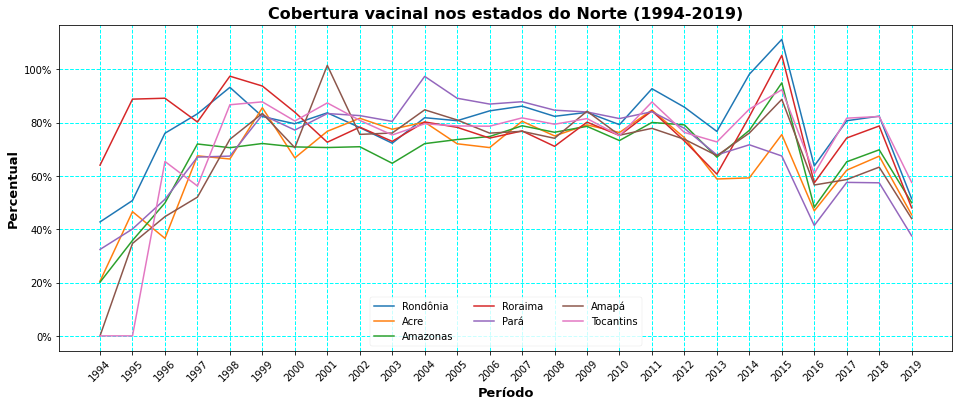

In [ ]:
ax = dados_geral[dados_geral['Região'] == 'Norte'].drop(['Região'], axis = 1).T.plot(figsize = (16,6))
rotulos = dados_geral[dados_geral['Região'] == 'Norte'].drop(['Região'], axis = 1).columns
plt.xticks(ticks= np.arange(start = min(rotulos), stop = max(rotulos)+1), labels= rotulos)
plt.grid(linestyle = '--', linewidth = 1, color = 'cyan')
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%d%%'))
plt.ylabel('Percentual', fontdict={'fontsize': 13, 'fontweight':'bold'})
plt.xlabel('Período', fontdict={'fontsize': 13, 'fontweight':'bold'})
plt.title('Cobertura vacinal nos estados do Norte (1994-2019)', fontdict={'fontsize': 16, 'fontweight':'bold'})
plt.style.use('seaborn-notebook')
plt.legend(ncol = 3, loc = 'lower center')
plt.xticks(rotation = 45)
plt.show()

Já de pronto observamos graficamente alguns pontos interessantes:

- Em todos os estados da região Norte, de 2013 a 2015 houve um aumento da cobertura, seguindo de forte queda em 2016. Por que?
- Em todos os estados da região Norte, observa-se uma queda acentuada em 2019. Por que?
- De 1998 a 2012 houve um platô de estabilidade, onde a variação não se observa fortes variações.

Vejamos a região Nordeste

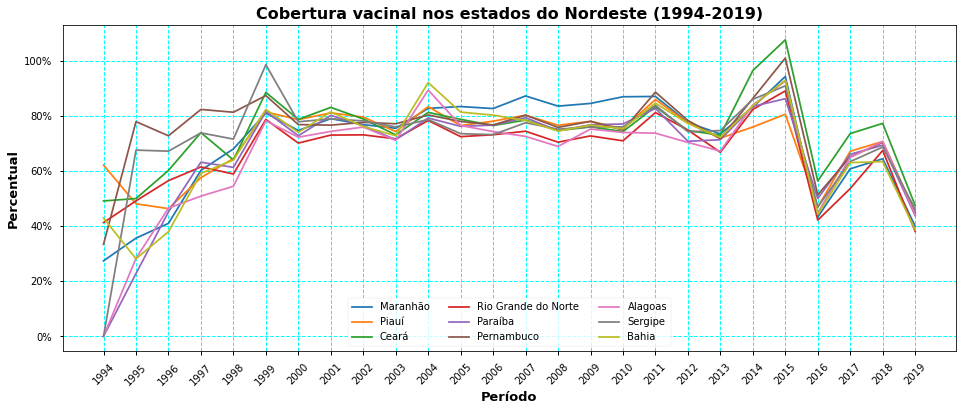

In [ ]:
ax = dados_geral[dados_geral['Região'] == 'Nordeste'].drop(['Região'], axis = 1).T.plot(figsize = (16,6))
rotulos = dados_geral[dados_geral['Região'] == 'Nordeste'].drop(['Região'], axis = 1).columns
plt.xticks(ticks= np.arange(start = min(rotulos), stop = max(rotulos)+1), labels= rotulos)
plt.grid(linestyle = '--', linewidth = 1, color = 'cyan')
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%d%%'))
plt.ylabel('Percentual', fontdict={'fontsize': 13, 'fontweight':'bold'})
plt.xlabel('Período', fontdict={'fontsize': 13, 'fontweight':'bold'})
plt.title('Cobertura vacinal nos estados do Nordeste (1994-2019)', fontdict={'fontsize': 16, 'fontweight':'bold'})
plt.legend(ncol = 3, loc = 'lower center')
plt.xticks(rotation = 45)
plt.show()

Notamos o mesmo padrão observado antes na Região Norte.

Agora a Região Sudeste:

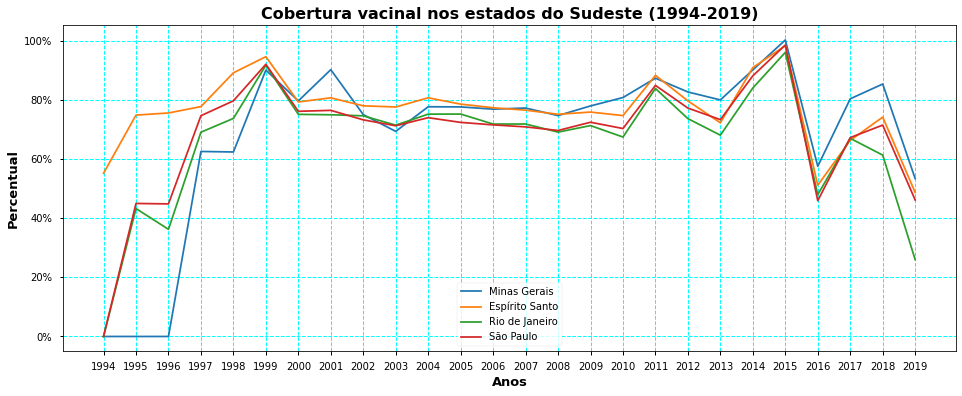

In [ ]:
ax = dados_geral[dados_geral['Região'] == 'Sudeste'].drop(['Região'], axis = 1).T.plot(figsize = (16,6))
rotulos = dados_geral[dados_geral['Região'] == 'Sudeste'].drop(['Região'], axis = 1).columns
plt.xticks(ticks= np.arange(start = min(rotulos), stop = max(rotulos)+1), labels= rotulos)
plt.grid(linestyle = '--', linewidth = 1, color = 'cyan')
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%d%%'))
plt.ylabel('Percentual', fontdict={'fontsize': 13, 'fontweight':'bold'})
plt.xlabel('Anos', fontdict={'fontsize': 13, 'fontweight':'bold'})
plt.title('Cobertura vacinal nos estados do Sudeste (1994-2019)', fontdict={'fontsize': 16, 'fontweight':'bold'})
plt.legend(ncol = 1, loc = 'lower center')
plt.show()

Região Sul:

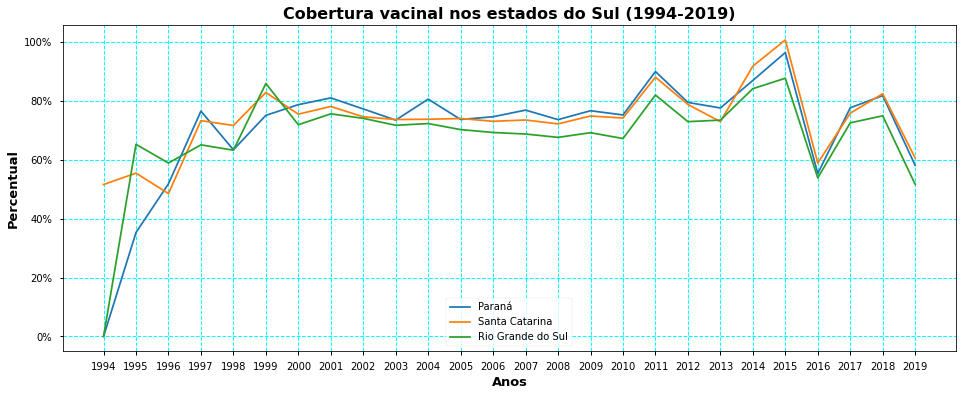

In [ ]:
ax = dados_geral[dados_geral['Região'] == 'Sul'].drop(['Região'], axis = 1).T.plot(figsize = (16,6))
rotulos = dados_geral[dados_geral['Região'] == 'Sul'].drop(['Região'], axis = 1).columns
plt.xticks(ticks= np.arange(start = min(rotulos), stop = max(rotulos)+1), labels= rotulos)
plt.grid(linestyle = '--', linewidth = 1, color = 'cyan')
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%d%%'))
plt.ylabel('Percentual', fontdict={'fontsize': 13, 'fontweight':'bold'})
plt.xlabel('Anos', fontdict={'fontsize': 13, 'fontweight':'bold'})
plt.title('Cobertura vacinal nos estados do Sul (1994-2019)', fontdict={'fontsize': 16, 'fontweight':'bold'})
plt.legend(ncol = 1, loc = 'lower center')
plt.show()

Região Centro-Oeste:

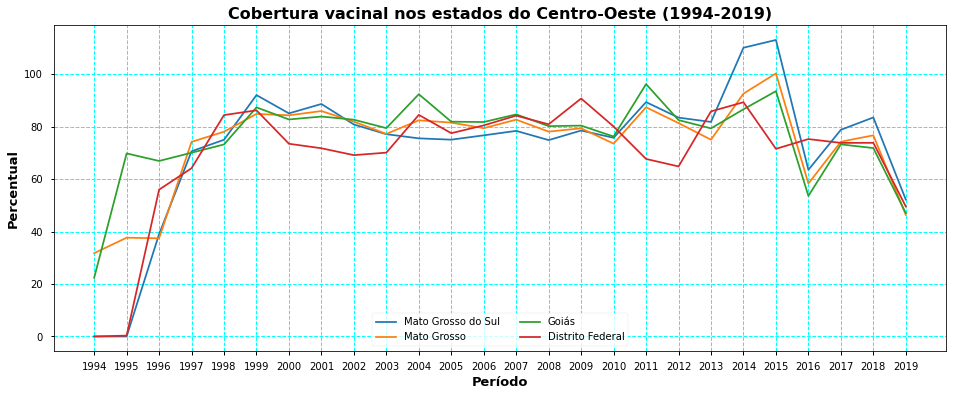

In [ ]:
ax = dados_geral[dados_geral['Região'] == 'Centro-Oeste'].drop(['Região'], axis = 1).T.plot(figsize = (16,6))
rotulos = dados_geral[dados_geral['Região'] == 'Centro-Oeste'].drop(['Região'], axis = 1).columns
plt.xticks(ticks= np.arange(start = min(rotulos), stop = max(rotulos)+1), labels= rotulos)
plt.grid(linestyle = '--', linewidth = 1, color = 'cyan')
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
plt.ylabel('Percentual', fontdict={'fontsize': 13, 'fontweight':'bold'})
plt.xlabel('Período', fontdict={'fontsize': 13, 'fontweight':'bold'})
plt.title('Cobertura vacinal nos estados do Centro-Oeste (1994-2019)', fontdict={'fontsize': 16, 'fontweight':'bold'})
plt.legend(ncol = 2, loc =  'lower center')
plt.show()

Vemos então que a maioria dos estados apresenta comportamentos similares, já observados anteriormente. A excessão é o Distrito Federal que, na contramão da tendência, pareceu apresentar um crescimento da cobertura vacinal de 2015 a 2016. No entanto, apresentou um queda acentuada em 2019, como todos os outros. 


Surgem então três grandes perguntas:

- Por que as coberturas vacinais caíram tanto em 2016, com excessão do Distrito Federal?
- Por que o comportamento diferente do Distrito Federal?
- Por que as coberturas vacinais caíram tanto em 2019?

Outros questinamentos adjacentes também podem ser interessantes:
- Quais estados apresentaram maiores quedas?
- Quais vacinas apresentaram maiores quedas?

### Maiores quedas (por UF)

Essa análise inicial já valida a tese de que houve uma queda nas coberturas vacinais, de 2015 a 2019 e também 2010-2019. Porém ainda não explica o motivo. 
Vejamos em números o quão expressiva foi essa queda, comparado os valores de 2019 com 2010 e 2015.

In [ ]:
queda_CV = pd.DataFrame()
queda_CV['2010-2019'] = (dados_geral.drop('Região', axis = 1)[2019]/dados_geral.drop('Região', axis = 1)[2010] - 1)*100
queda_CV['2010-2015'] = (dados_geral.drop('Região', axis = 1)[2015]/dados_geral.drop('Região', axis = 1)[2010] - 1)*100
queda_CV['2015-2019'] = (dados_geral.drop('Região', axis = 1)[2019]/dados_geral.drop('Região', axis = 1)[2015] - 1)*100
queda_CV.insert(0, 'Região', dados_geral['Região'])
queda_CV

Região  2010-2019  2010-2015  2015-2019
Unidade da Federação                                               
Rondônia                     Norte     -35.10      40.39     -53.77
Acre                         Norte     -40.46      -1.02     -39.85
Amazonas                     Norte     -31.83      29.54     -47.37
Roraima                      Norte     -36.11      40.01     -54.36
Pará                         Norte     -53.98     -17.22     -44.41
Amapá                        Norte     -41.55      17.85     -50.40
Tocantins                    Norte     -23.34      22.96     -37.65
Maranhão                  Nordeste     -53.99       8.46     -57.57
Piauí                     Nordeste     -40.51       6.95     -44.37
Ceará                     Nordeste     -36.12      44.77     -55.87
Rio Grande do Norte       Nordeste     -46.37      25.52     -57.27
Paraíba                   Nordeste     -43.14      11.91     -49.19
Pernambuco                Nordeste     -40.08      34.88     -55.57
Alagoas                   Nordeste     -40.25      25.19     -52.28
Sergipe                   Nordeste     -39.29      19.55     -49.22
Bahia                     Nordeste     -48.71      23.41     -58.44
Minas Gerais               Sudeste     -33.91      24.09     -46.75
Espírito Santo             Sudeste     -34.81      31.64     -50.48
Rio de Janeiro             Sudeste     -61.48      42.47     -72.97
São Paulo                  Sudeste     -34.37      40.18     -53.18
Paraná                         Sul     -22.75      28.17     -39.73
Santa Catarina                 Sul     -18.32      35.74     -39.83
Rio Grande do Sul              Sul     -23.16      30.45     -41.10
Mato Grosso do Sul    Centro-Oeste     -31.09      49.23     -53.83
Mato Grosso           Centro-Oeste     -36.93      36.42     -53.77
Goiás                 Centro-Oeste     -38.31      22.69     -49.72
Distrito Federal      Centro-Oeste     -38.08     -10.64     -30.71

Vejamos as maiores quedas percentuais na década:

In [ ]:
queda_CV.sort_values(by = '2010-2019')

Região  2010-2019  2010-2015  2015-2019
Unidade da Federação                                               
Rio de Janeiro             Sudeste     -61.48      42.47     -72.97
Maranhão                  Nordeste     -53.99       8.46     -57.57
Pará                         Norte     -53.98     -17.22     -44.41
Bahia                     Nordeste     -48.71      23.41     -58.44
Rio Grande do Norte       Nordeste     -46.37      25.52     -57.27
Paraíba                   Nordeste     -43.14      11.91     -49.19
Amapá                        Norte     -41.55      17.85     -50.40
Piauí                     Nordeste     -40.51       6.95     -44.37
Acre                         Norte     -40.46      -1.02     -39.85
Alagoas                   Nordeste     -40.25      25.19     -52.28
Pernambuco                Nordeste     -40.08      34.88     -55.57
Sergipe                   Nordeste     -39.29      19.55     -49.22
Goiás                 Centro-Oeste     -38.31      22.69     -49.72
Distrito Federal      Centro-Oeste     -38.08     -10.64     -30.71
Mato Grosso           Centro-Oeste     -36.93      36.42     -53.77
Ceará                     Nordeste     -36.12      44.77     -55.87
Roraima                      Norte     -36.11      40.01     -54.36
Rondônia                     Norte     -35.10      40.39     -53.77
Espírito Santo             Sudeste     -34.81      31.64     -50.48
São Paulo                  Sudeste     -34.37      40.18     -53.18
Minas Gerais               Sudeste     -33.91      24.09     -46.75
Amazonas                     Norte     -31.83      29.54     -47.37
Mato Grosso do Sul    Centro-Oeste     -31.09      49.23     -53.83
Tocantins                    Norte     -23.34      22.96     -37.65
Rio Grande do Sul              Sul     -23.16      30.45     -41.10
Paraná                         Sul     -22.75      28.17     -39.73
Santa Catarina                 Sul     -18.32      35.74     -39.83

São dados preocupantes. Santa Catarina apresentou a menor queda percetual, de -18,32%, e ainda assim é um valor alto. Rio de Janeiro lidera, com impressionantes -61,48%. 
Vamos sumarizar isso em dois gráficos:

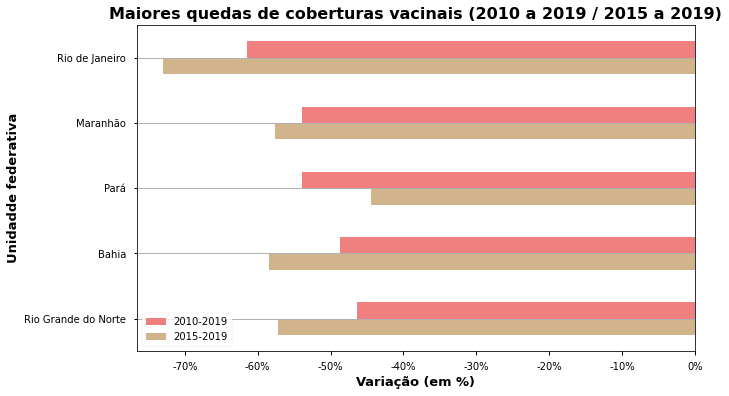

In [ ]:
ax = queda_CV.sort_values(by = '2010-2019')[['2010-2019', '2015-2019']][0:5].plot(kind = 'barh',
                                                                                  figsize = (10,6), color = ['lightcoral', 'tan'])
plt.gca().invert_yaxis()
plt.style.use('fivethirtyeight')
plt.title('Maiores quedas de coberturas vacinais (2010 a 2019 / 2015 a 2019)', fontdict= {'fontsize':16, 'fontweight':'bold'})
plt.xlabel('Variação (em %)',fontdict= {'fontsize':13, 'fontweight':'bold'})
plt.ylabel('Unidadde federativa', fontdict= {'fontsize':13, 'fontweight':'bold'})
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%d%%'))
plt.grid(axis = 'y')
plt.show()

Vejamos o gráfico das menores quedas:

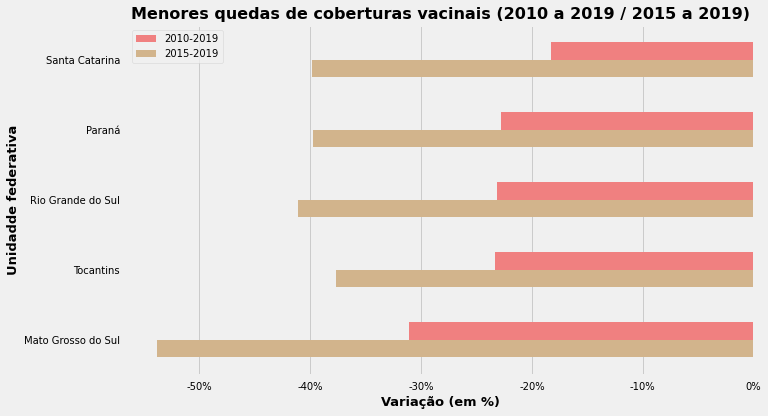

In [ ]:
ax = queda_CV.sort_values(by = '2010-2019', ascending=False)[['2010-2019', '2015-2019']][0:5].plot(kind = 'barh',
                                                                                  figsize = (10,6), color = ['lightcoral', 'tan'])
plt.gca().invert_yaxis()
plt.style.use('fivethirtyeight')
plt.title('Menores quedas de coberturas vacinais (2010 a 2019 / 2015 a 2019)', fontdict= {'fontsize':16, 'fontweight':'bold'})
plt.xlabel('Variação (em %)',fontdict= {'fontsize':13, 'fontweight':'bold'})
plt.ylabel('Unidadde federativa', fontdict= {'fontsize':13, 'fontweight':'bold'})
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%d%%'))
plt.grid(axis = 'y')
plt.show()

In [ ]:
print('De 2010 a 2019, as coberturas vacinais tiveram uma queda média de ', '{:.2f}'.format(queda_CV['2010-2019'].mean()), '%' )

De 2010 a 2019, as coberturas vacinais tiveram uma queda média de  -37.93 %


### Hipóteses e busca por respostas

Observada a validação da tese e a apresentação de novos questionamentos, o próximo passo é inicar uma busca por fatores ou acontecimentos que possam explicar o comportamento observado. 

No que diz respeito a queda em 2016, uma busca por notícias rapidamento nos leva a notícias sobre esse preocupante fato, como por exemplo, essa [matéria da Veja](https://veja.abril.com.br/saude/vacinacao-2016-teve-a-menor-cobertura-da-ultima-decada/), de 2017:


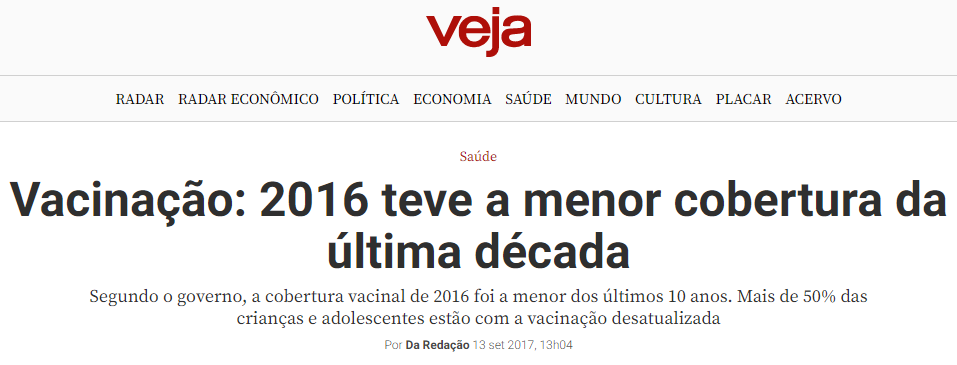

Buscando mais informações sobre a vacinação naquele ano, descobrimos que houve uma alteração do calendário de vacinação, conforme [fonte do próprio governo](https://www.saude.ce.gov.br/2015/12/16/calendario-basico-de-vacinacao-muda-em-2016/):

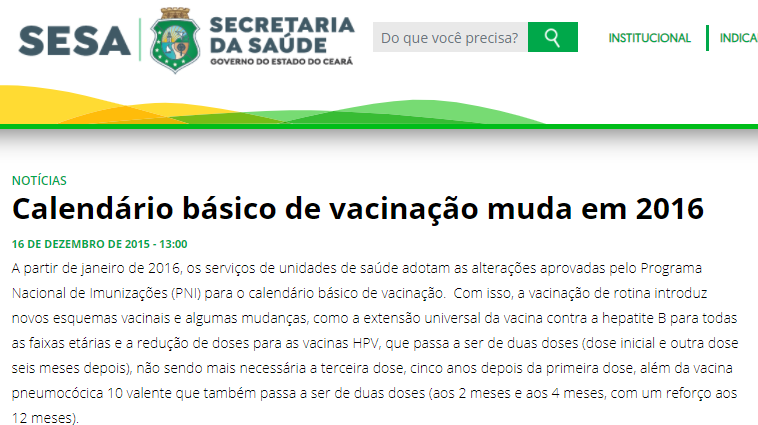

As mudanças foram:


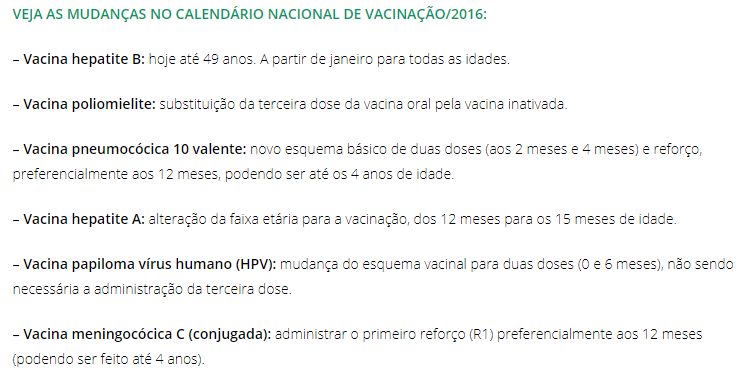

Supondo que essa mudança tenha sido a causa, ou uma das principais causas da repentina queda em 2016, uma hipótese é a seguinte: a população em geral ficou confusa quanto a quais vacinas tomar ou deixar de tomar, e acabou não comparecendo quanto deveria. Se confirmada essa hipótese, o governo poderia ter tomado medidas para melhorar a efeciêcia da campanha, enfatizado a importância da vacinação. 
Mas dada a dificuldade de testar essa hipótese com os dados extraídos do DATASUS, não iremos explorar esse caminho.


### Coberturas maiores que 100%

Porém, algo ainda mais curioso salta aos olhos: em algums anos nota-se uma cobertura vacinal cima de 100%. Em teoria isso é uma imposibilidade matemática. Na prática, levanto as seguintes possiveis explicações:
- Inexatidão nos dados, o que é esperado. Dado um país de proporções continentais como o Brasil, com uma polulação gigantesca e dada toda a logística das campanhas de vacinação e coleta de dados, é natural esperar que os valores não sejam exatos. Deve-se considerar uma margem de erro, para mais ou para menos. Essa hipótese é ainda mais validada quando, ao lermos sobre as informações técnicas disponibilizadas pelo DATASUS, constatamos que as informações populacionais (necessárias para o cálculo da CV) são estimativas do IBGE. 
- Supernotificação da quantidade de doses aplicadas, isto é, foram registradas mais vacinas do que foram realmente aplicadas. É uma hipótese menos provável, mas que deve ser levada em consideração. 

Façamos uma análise mais fina desse assunto, verificando se uma mudança no padrão das estimativas possa ter causado esses estranhos dados observados. O primeiro passo é identificar quais anos tiveram coberturas acima de 100%.

In [ ]:
dados_geral.drop('Região', axis = 1).max().sort_values(ascending = False)

2015   113.07
2014   110.11
2001   101.50
1999    98.68
1998    97.45
2004    97.38
2011    96.24
2009    90.75
1996    89.18
2005    89.17
1995    88.84
2007    87.87
2010    87.04
2006    86.99
2013    85.83
2012    85.82
2018    85.42
2000    85.08
2008    84.70
1997    83.33
2002    82.66
2017    81.70
2003    80.50
2016    75.28
1994    64.06
2019    60.59
dtype: float64

Observamos então que nos anos de 2001, 2014 e 2015 houveram coberturas vacinais que superaram os 100%. 
A cobertura de 101,5% em 2001 pode ser facilmente explicada por margem de erro proveniente da inexatidão dos dados coletados\estimados, como conjecturado acima. Porém as coberturas máximas de 2014 e 2015 parecem muito altas para serem explicadas apenas por pequenas impresições nos dados. 
Vamos analisar essas colunas, apenas com os estados onde houve cobertura maior que 100%:

In [ ]:
dados_geral[(dados_geral[2014] > 100) | (dados_geral[2015] > 100)][[2014,2015]]

2014   2015
Unidade da Federação              
Rondônia              98.18 111.27
Roraima               82.30 105.27
Ceará                 96.57 107.71
Pernambuco            86.44 101.09
Minas Gerais          90.21 100.33
Santa Catarina        91.81 100.69
Mato Grosso do Sul   110.11 113.07
Mato Grosso           92.61 100.32

Vamos coletar os índices desses estados em uma lista

In [ ]:
UF_a_analizar = dados_geral[(dados_geral[2014] > 100) | (dados_geral[2015] > 100)].index.tolist()

Vejamos os dados da população residente, segundo as estimativas do IBGE.

In [ ]:
dados_pop = pd.read_csv('/content/pop_residente.csv', sep = ';', decimal= ',', encoding= 'ISO-8859-1',
                          skiprows = 3, skipfooter = 5)
dados_pop.head()

Unidade da Federação     2000     2001  ...     2017     2018     2019
0          11 Rondônia  1409018  1432779  ...  1737578  1757589  1777225
1              12 Acre   582172   600611  ...   856457   869265   881935
2          13 Amazonas  2868193  2939965  ...  4015812  4080611  4144597
3           14 Roraima   333356   345858  ...   546885   576568   605761
4              15 Pará  6371212  6517813  ...  8422634  8513497  8602865

[5 rows x 21 columns]

In [ ]:
dados_pop['Total'] = dados_pop.sum() #necessário para poder utilizar a função criar_regioes()

In [ ]:
criar_regioes(dados_pop)

                            Região          2000  ...          2018          2019
Unidade da Federação                              ...                            
Rondônia                     Norte  1,409,018.00  ...  1,757,589.00  1,777,225.00
Acre                         Norte    582,172.00  ...    869,265.00    881,935.00
Amazonas                     Norte  2,868,193.00  ...  4,080,611.00  4,144,597.00
Roraima                      Norte    333,356.00  ...    576,568.00    605,761.00
Pará                         Norte  6,371,212.00  ...  8,513,497.00  8,602,865.00
Amapá                        Norte    495,193.00  ...    829,494.00    845,731.00
Tocantins                    Norte  1,190,019.00  ...  1,555,229.00  1,572,866.00
Maranhão                  Nordeste  5,835,996.00  ...  7,035,055.00  7,075,181.00
Piauí                     Nordeste  2,922,884.00  ...  3,264,531.00  3,273,227.00
Ceará                     Nordeste  7,625,504.00  ...  9,075,649.00  9,132,078.00
Rio Grande do No

In [ ]:
pop_a_analizar = dados_pop.drop('Região', axis = 1).T[UF_a_analizar].T 

Vejamos as variações das populações:

In [ ]:
var_pop = pd.DataFrame()
for ano in range(2001,2020):
  var_pop[ano] = (pop_a_analizar[ano] / pop_a_analizar[ano -1] - 1)*100

var_pop  


2001  2002  2003  2004  ...  2016  2017  2018  2019
Unidade da Federação                          ...                        
Rondônia              1.69  1.53  1.39  1.32  ...  1.16  1.14  1.15  1.12
Roraima               3.75  3.53  3.43  3.44  ...  2.46  3.98  5.43  5.06
Ceará                 1.54  1.44  1.34  1.25  ...  0.65  0.62  0.64  0.62
Pernambuco            1.25  1.15  1.11  1.08  ...  0.64  0.61  0.66  0.64
Minas Gerais          1.14  1.02  0.95  0.89  ...  0.64  0.62  0.63  0.61
Santa Catarina        1.71  1.59  1.53  1.51  ...  1.35  1.32  1.30  1.26
Mato Grosso do Sul    1.77  1.67  1.66  1.65  ...  1.19  1.16  1.16  1.13
Mato Grosso           2.11  2.02  1.99  1.99  ...  1.28  1.25  1.27  1.23

[8 rows x 19 columns]

Curioso notar que o Ceará apresentou uma estranha queda no aumento da população, a partir de 2009. Uma possível análise futura seria tentar entender o motivo dessa diminuição. 

Vamos calcular as coberturas vacinais em 2014, 2015 e 2016, supondo que as populações vão crescer na mesma taxa média que cresceram de 2009 até 2013.

In [ ]:
var_pop[[2009,2010,2011,2012,2013]].T.mean()

Unidade da Federação
Rondônia             1.14
Roraima              2.54
Ceará                0.81
Pernambuco           0.78
Minas Gerais         0.68
Santa Catarina       1.38
Mato Grosso do Sul   1.34
Mato Grosso          1.45
dtype: float64

In [ ]:
novo_var_pop = var_pop
novo_var_pop['Média'] = var_pop[[2009,2010,2011,2012,2013]].T.mean()
novo_var_pop[2014] = novo_var_pop['Média']
novo_var_pop[2015] = novo_var_pop['Média']
novo_var_pop[2016] = novo_var_pop['Média']

In [ ]:
novo_var_pop

2001  2002  2003  2004  ...  2017  2018  2019  Média
Unidade da Federação                          ...                         
Rondônia              1.69  1.53  1.39  1.32  ...  1.14  1.15  1.12   1.14
Roraima               3.75  3.53  3.43  3.44  ...  3.98  5.43  5.06   2.54
Ceará                 1.54  1.44  1.34  1.25  ...  0.62  0.64  0.62   0.81
Pernambuco            1.25  1.15  1.11  1.08  ...  0.61  0.66  0.64   0.78
Minas Gerais          1.14  1.02  0.95  0.89  ...  0.62  0.63  0.61   0.68
Santa Catarina        1.71  1.59  1.53  1.51  ...  1.32  1.30  1.26   1.38
Mato Grosso do Sul    1.77  1.67  1.66  1.65  ...  1.16  1.16  1.13   1.34
Mato Grosso           2.11  2.02  1.99  1.99  ...  1.25  1.27  1.23   1.45

[8 rows x 20 columns]

In [ ]:
novo_dados_pop = pd.DataFrame()
novo_dados_pop[2001] = pop_a_analizar[2001]

for ano in range(2002,2020):
  novo_dados_pop[ano] = novo_dados_pop[ano - 1]*(0.01*novo_var_pop[ano]+1)

In [ ]:
pop_a_analizar

2000          2001  ...          2018          2019
Unidade da Federação                              ...                            
Rondônia              1,409,018.00  1,432,779.00  ...  1,757,589.00  1,777,225.00
Roraima                 333,356.00    345,858.00  ...    576,568.00    605,761.00
Ceará                 7,625,504.00  7,743,048.00  ...  9,075,649.00  9,132,078.00
Pernambuco            8,117,165.00  8,218,631.00  ...  9,496,294.00  9,557,071.00
Minas Gerais         18,351,529.00 18,560,709.00  ... 21,040,662.00 21,168,791.00
Santa Catarina        5,483,651.00  5,577,642.00  ...  7,075,494.00  7,164,788.00
Mato Grosso do Sul    2,132,596.00  2,170,330.00  ...  2,748,023.00  2,778,986.00
Mato Grosso           2,570,078.00  2,624,341.00  ...  3,441,998.00  3,484,466.00

[8 rows x 20 columns]

In [ ]:
novo_dados_pop

2001          2002  ...          2018          2019
Unidade da Federação                              ...                            
Rondônia              1,432,779.00  1,454,686.00  ...  1,754,366.65  1,773,966.65
Roraima                 345,858.00    358,071.00  ...    580,383.88    609,770.09
Ceará                 7,743,048.00  7,854,562.00  ...  9,121,677.65  9,178,392.84
Pernambuco            8,218,631.00  8,313,498.00  ...  9,526,658.25  9,587,629.59
Minas Gerais         18,560,709.00 18,750,916.00  ... 21,052,185.50 21,180,384.67
Santa Catarina        5,577,642.00  5,666,538.00  ...  7,078,948.06  7,168,285.65
Mato Grosso do Sul    2,170,330.00  2,206,669.00  ...  2,757,067.90  2,788,132.82
Mato Grosso           2,624,341.00  2,677,427.00  ...  3,453,565.06  3,496,175.77

[8 rows x 19 columns]

In [ ]:
dados_UF_a_analizar = dados_geral[(dados_geral[2014] > 100) | (dados_geral[2015] > 100)]

novo_CV_a_analizar = dados_UF_a_analizar * (pop_a_analizar/novo_dados_pop)

In [ ]:
novo_CV_a_analizar

1994  1995  1996  1997  ...  2017  2018  2019  Região
Unidade da Federação                          ...                          
Rondônia               nan   nan   nan   nan  ... 80.89 82.60 51.53     nan
Roraima                nan   nan   nan   nan  ... 73.77 78.24 47.72     nan
Ceará                  nan   nan   nan   nan  ... 73.30 76.98 47.29     nan
Pernambuco             nan   nan   nan   nan  ... 64.99 70.21 44.77     nan
Minas Gerais           nan   nan   nan   nan  ... 80.38 85.37 53.40     nan
Santa Catarina         nan   nan   nan   nan  ... 75.78 82.39 60.56     nan
Mato Grosso do Sul     nan   nan   nan   nan  ... 78.55 83.25 52.04     nan
Mato Grosso            nan   nan   nan   nan  ... 74.03 76.44 46.22     nan

[8 rows x 27 columns]

Ainda assim, observamos que Mato Grosso do Sul, Rondônia, Roraima e Ceará apresentam coberturas vacinais estranhamente acima de 100%. Todavia, não dá para descartar a hipótese de que as estimativas populacionais estão incorretas, apenas que a nova métrica utilizada não explica essa estranha variação. Seria preciso uma análise mais refinada do caso.

Essa análise nos faz levantar o seguinte questionamento:

**Houve supernotificação do número de doses em 2014 e 2015, nos estados de Roraima, Rondônia, Ceará e Mato Grosso do Sul?**

## Dados Imunos

Vamos agora analizar os dados das coberturas vacinais por imunizante e ano de aplicação. Como temos uma quantidade grande de linhas, não seria interessante plotar todas elas em um único gráfico. Vamos então plotar cinco gráficos, dividindo as linhas em grupos de 4 ou 5.

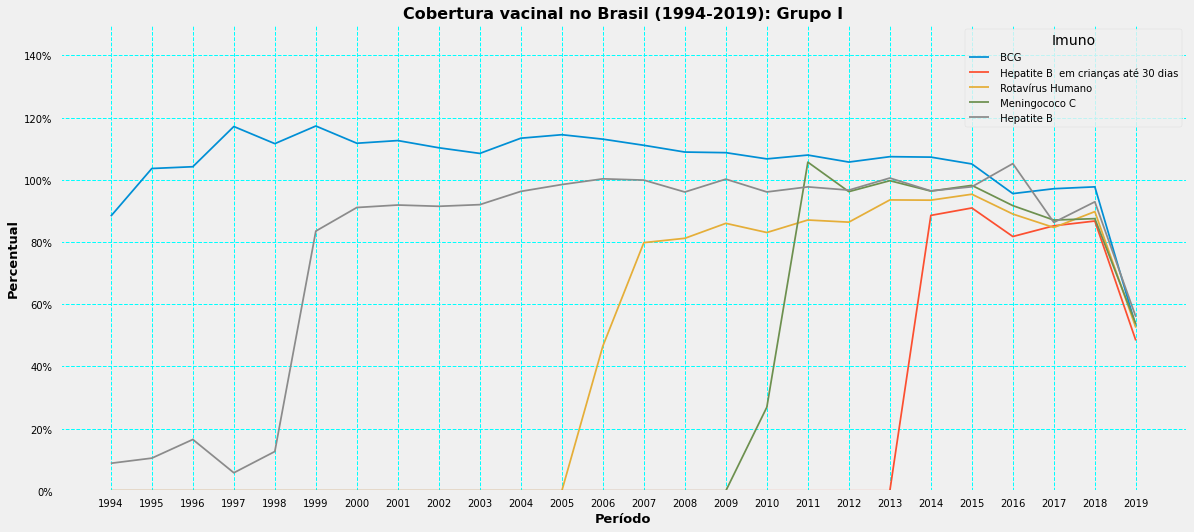

In [ ]:

ax = dados_imuno[0:5].T.plot(figsize = (18,8))
plt.ylim(0,150)
rotulos = dados_geral[dados_geral['Região'] == 'Centro-Oeste'].drop(['Região'], axis = 1).columns
plt.xticks(ticks= np.arange(start = min(rotulos), stop = max(rotulos)+1), labels= rotulos)
plt.grid(linestyle = '--', linewidth = 1, color = 'cyan')
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%d%%'))
plt.ylabel('Percentual', fontdict={'fontsize': 13, 'fontweight':'bold'})
plt.xlabel('Período', fontdict={'fontsize': 13, 'fontweight':'bold'})
plt.title('Cobertura vacinal no Brasil (1994-2019): Grupo I', fontdict={'fontsize': 16, 'fontweight':'bold'})
plt.style.use('seaborn-notebook')
plt.show()

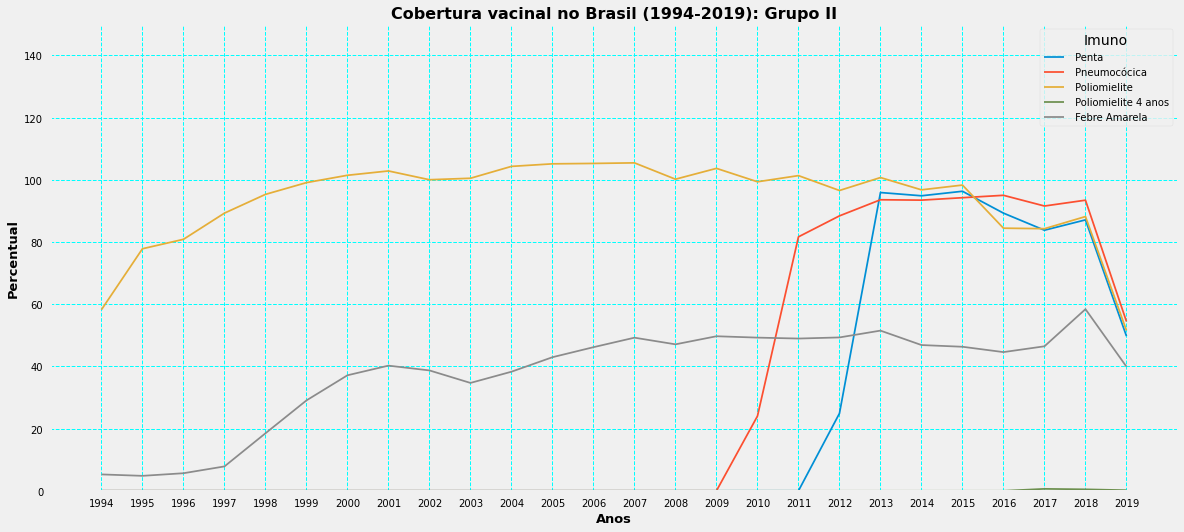

In [ ]:

ax = dados_imuno[5:10].T.plot(figsize = (18,8))
plt.ylim(0,150)
rotulos = dados_geral[dados_geral['Região'] == 'Centro-Oeste'].drop(['Região'], axis = 1).columns
plt.xticks(ticks= np.arange(start = min(rotulos), stop = max(rotulos)+1), labels= rotulos)
plt.grid(linestyle = '--', linewidth = 1, color = 'cyan')
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
plt.ylabel('Percentual', fontdict={'fontsize': 13, 'fontweight':'bold'})
plt.xlabel('Anos', fontdict={'fontsize': 13, 'fontweight':'bold'})
plt.title('Cobertura vacinal no Brasil (1994-2019): Grupo II', fontdict={'fontsize': 16, 'fontweight':'bold'})
plt.style.use('seaborn-notebook')
plt.show()

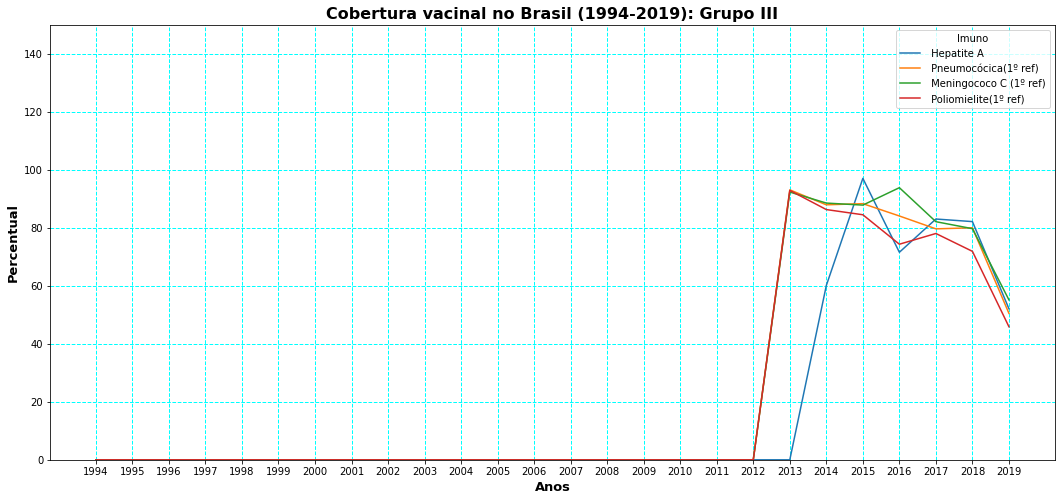

In [ ]:
ax = dados_imuno[10:14].T.plot(figsize = (18,8))
plt.ylim(0,150)
rotulos = dados_geral[dados_geral['Região'] == 'Centro-Oeste'].drop(['Região'], axis = 1).columns
plt.xticks(ticks= np.arange(start = min(rotulos), stop = max(rotulos)+1), labels= rotulos)
plt.grid(linestyle = '--', linewidth = 1, color = 'cyan')
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
plt.ylabel('Percentual', fontdict={'fontsize': 13, 'fontweight':'bold'})
plt.xlabel('Anos', fontdict={'fontsize': 13, 'fontweight':'bold'})
plt.title('Cobertura vacinal no Brasil (1994-2019): Grupo III', fontdict={'fontsize': 16, 'fontweight':'bold'})
plt.show()

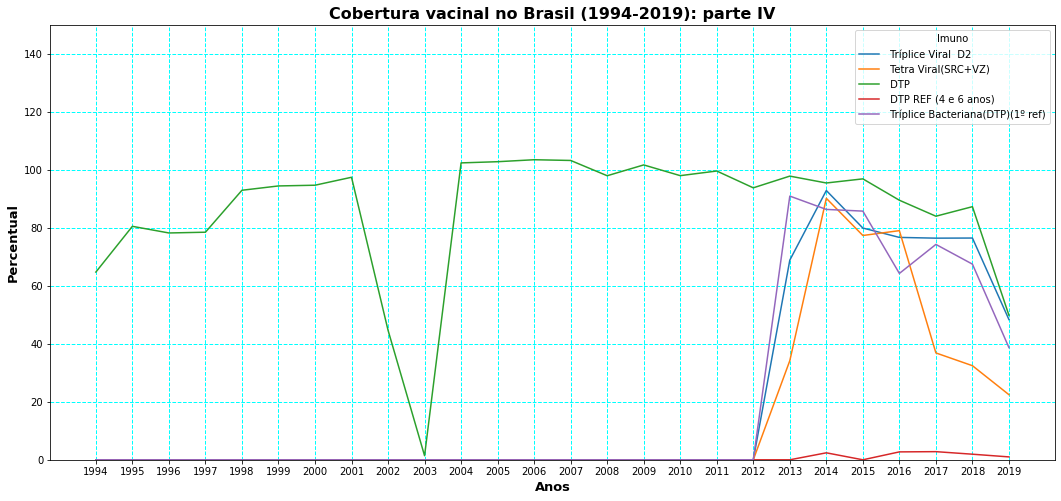

In [ ]:
ax = dados_imuno[15:20].T.plot(figsize = (18,8))
plt.ylim(0,150)
rotulos = dados_geral[dados_geral['Região'] == 'Centro-Oeste'].drop(['Região'], axis = 1).columns
plt.xticks(ticks= np.arange(start = min(rotulos), stop = max(rotulos)+1), labels= rotulos)
plt.grid(linestyle = '--', linewidth = 1, color = 'cyan')
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
plt.ylabel('Percentual', fontdict={'fontsize': 13, 'fontweight':'bold'})
plt.xlabel('Anos', fontdict={'fontsize': 13, 'fontweight':'bold'})
plt.title('Cobertura vacinal no Brasil (1994-2019): parte IV', fontdict={'fontsize': 16, 'fontweight':'bold'})
plt.show()

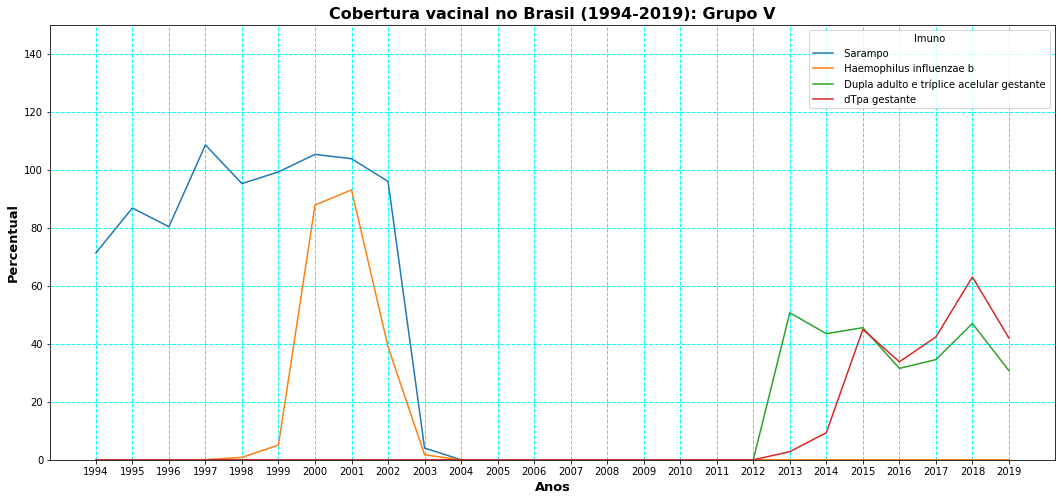

In [ ]:
ax = dados_imuno[20:25].T.plot(figsize = (18,8))
plt.ylim(0,150)
rotulos = dados_geral[dados_geral['Região'] == 'Centro-Oeste'].drop(['Região'], axis = 1).columns
plt.xticks(ticks= np.arange(start = min(rotulos), stop = max(rotulos)+1), labels= rotulos)
plt.grid(linestyle = '--', linewidth = 1, color = 'cyan')
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
plt.ylabel('Percentual', fontdict={'fontsize': 13, 'fontweight':'bold'})
plt.xlabel('Anos', fontdict={'fontsize': 13, 'fontweight':'bold'})
plt.title('Cobertura vacinal no Brasil (1994-2019): Grupo V', fontdict={'fontsize': 16, 'fontweight':'bold'})
plt.show()

Observamos novamente que temos coberturas vacinais maiores que 100%, especialmente com a BCG, contra polio e contra sarampo. As duas primeiras são vacinas aplicadas em crianças com menos de um ano. 

Vejamos apenas aquelas vacinas que tiveram queda de 2010 a 2019

In [ ]:
imuno_queda = dados_imuno[dados_imuno[2010] > dados_imuno[2019]]
imuno_queda

1994   1995   1996   1997  ...   2016  2017  2018  2019
Imuno                                           ...                         
 BCG                88.29 103.62 104.19 117.12  ...  95.55 97.12 97.72 52.95
 Rotavírus Humano    0.00   0.00   0.00   0.00  ...  88.98 84.65 89.76 52.47
 Hepatite B          8.85  10.50  16.50   5.79  ... 105.19 86.29 92.91 55.93
 Poliomielite       58.23  77.82  80.85  89.27  ...  84.43 84.27 88.17 51.54
 Febre Amarela       5.27   4.81   5.65   7.84  ...  44.59 46.46 58.40 39.91
 Tríplice Viral  D1  0.00   0.00   0.00   0.00  ...  95.41 90.85 91.89 57.19
 DTP                64.75  80.53  78.24  78.50  ...  89.53 84.02 87.31 49.86

[7 rows x 26 columns]

Notamos nessa lista uma presença forte de vacinas infantis: BCG, poliomelite, tríplice bacteriana e rotavírus, todas elas vacinas aplicadas em crianças. 

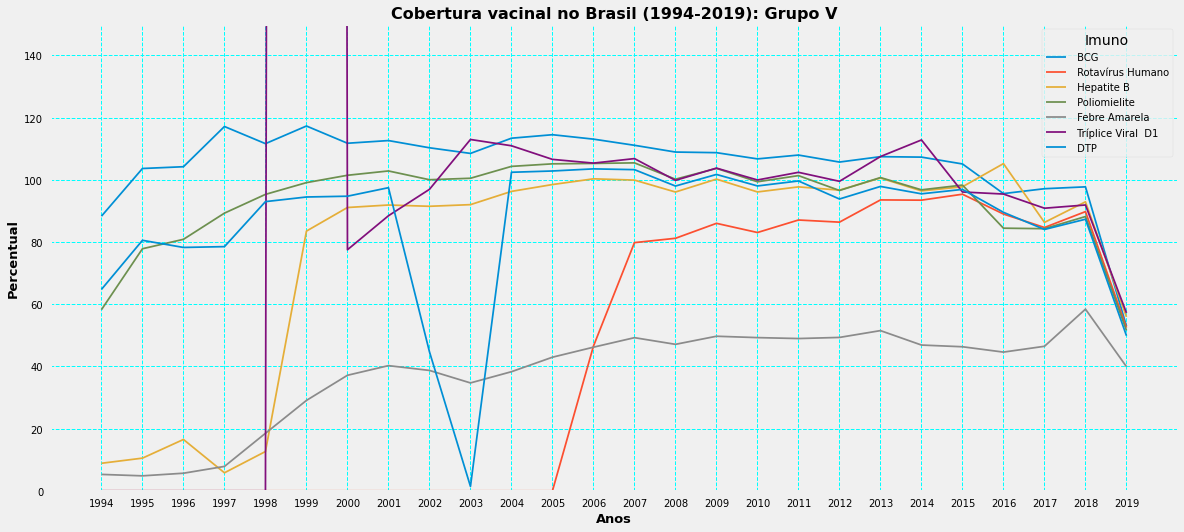

In [ ]:
ax = imuno_queda.T.plot(figsize = (18,8))
plt.ylim(0,150)
rotulos = dados_geral[dados_geral['Região'] == 'Centro-Oeste'].drop(['Região'], axis = 1).columns
plt.xticks(ticks= np.arange(start = min(rotulos), stop = max(rotulos)+1), labels= rotulos)
plt.grid(linestyle = '--', linewidth = 1, color = 'cyan')
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
plt.ylabel('Percentual', fontdict={'fontsize': 13, 'fontweight':'bold'})
plt.xlabel('Período', fontdict={'fontsize': 13, 'fontweight':'bold'})
plt.title('Cobertura vacinal no Brasil (1994-2019): Imunizantes com maiores quedas na década', fontdict={'fontsize': 16, 'fontweight':'bold'})
plt.show()

## BCG

Nessa sessão, vamos analizar os gráficos temporais da cobertura vacinal de BCG, no período de 1994 a 2019, por região.

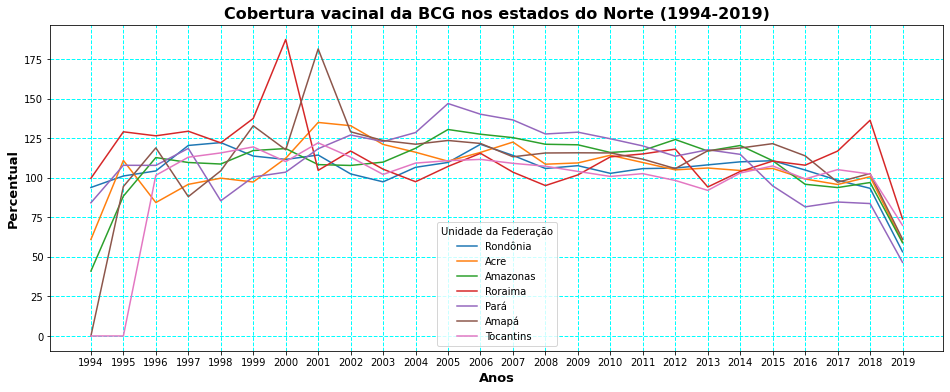

In [ ]:
ax = dados_BCG[dados_BCG['Região'] == 'Norte'].drop(['Região'], axis = 1).T.plot(figsize = (16,6))
rotulos = dados_geral[dados_geral['Região'] == 'Norte'].drop(['Região'], axis = 1).columns
plt.xticks(ticks= np.arange(start = min(rotulos), stop = max(rotulos)+1), labels= rotulos)
plt.grid(linestyle = '--', linewidth = 1, color = 'cyan')
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
plt.ylabel('Percentual', fontdict={'fontsize': 13, 'fontweight':'bold'})
plt.xlabel('Anos', fontdict={'fontsize': 13, 'fontweight':'bold'})
plt.title('Cobertura vacinal da BCG nos estados do Norte (1994-2019)', fontdict={'fontsize': 16, 'fontweight':'bold'})
plt.show()

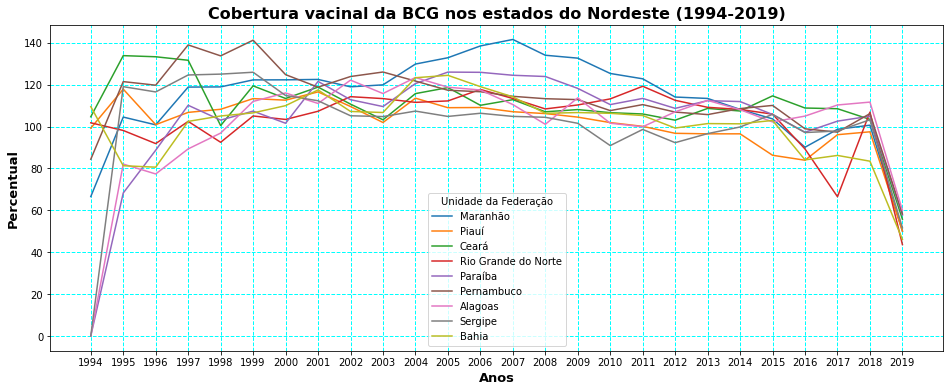

In [ ]:
ax = dados_BCG[dados_BCG['Região'] == 'Nordeste'].drop(['Região'], axis = 1).T.plot(figsize = (16,6))
rotulos = dados_geral[dados_geral['Região'] == 'Nordeste'].drop(['Região'], axis = 1).columns
plt.xticks(ticks= np.arange(start = min(rotulos), stop = max(rotulos)+1), labels= rotulos)
plt.grid(linestyle = '--', linewidth = 1, color = 'cyan')
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
plt.ylabel('Percentual', fontdict={'fontsize': 13, 'fontweight':'bold'})
plt.xlabel('Anos', fontdict={'fontsize': 13, 'fontweight':'bold'})
plt.title('Cobertura vacinal da BCG nos estados do Nordeste (1994-2019)', fontdict={'fontsize': 16, 'fontweight':'bold'})
plt.show()

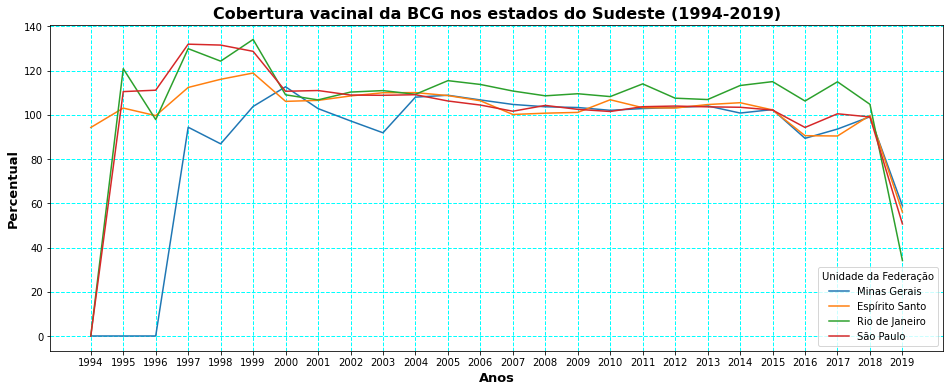

In [ ]:
ax = dados_BCG[dados_BCG['Região'] == 'Sudeste'].drop(['Região'], axis = 1).T.plot(figsize = (16,6))
rotulos = dados_geral[dados_geral['Região'] == 'Sudeste'].drop(['Região'], axis = 1).columns
plt.xticks(ticks= np.arange(start = min(rotulos), stop = max(rotulos)+1), labels= rotulos)
plt.grid(linestyle = '--', linewidth = 1, color = 'cyan')
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
plt.ylabel('Percentual', fontdict={'fontsize': 13, 'fontweight':'bold'})
plt.xlabel('Anos', fontdict={'fontsize': 13, 'fontweight':'bold'})
plt.title('Cobertura vacinal da BCG nos estados do Sudeste (1994-2019)', fontdict={'fontsize': 16, 'fontweight':'bold'})
plt.show()

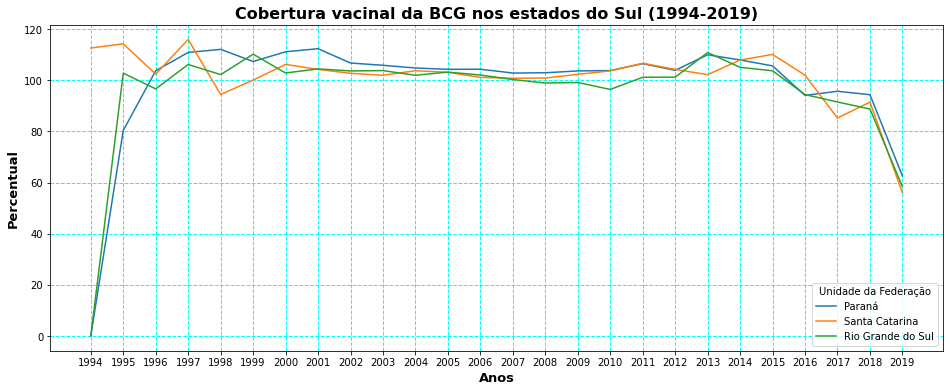

In [ ]:
ax = dados_BCG[dados_BCG['Região'] == 'Sul'].drop(['Região'], axis = 1).T.plot(figsize = (16,6))
rotulos = dados_geral[dados_geral['Região'] == 'Sul'].drop(['Região'], axis = 1).columns
plt.xticks(ticks= np.arange(start = min(rotulos), stop = max(rotulos)+1), labels= rotulos)
plt.grid(linestyle = '--', linewidth = 1, color = 'cyan')
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
plt.ylabel('Percentual', fontdict={'fontsize': 13, 'fontweight':'bold'})
plt.xlabel('Anos', fontdict={'fontsize': 13, 'fontweight':'bold'})
plt.title('Cobertura vacinal da BCG nos estados do Sul (1994-2019)', fontdict={'fontsize': 16, 'fontweight':'bold'})
plt.show()

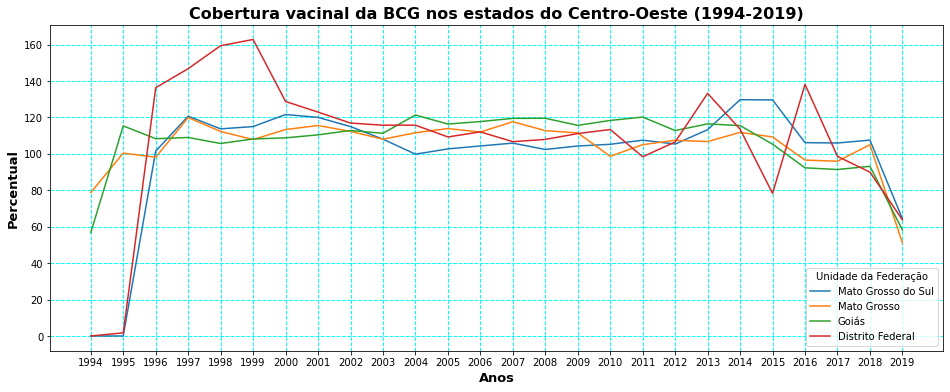

In [ ]:
ax = dados_BCG[dados_BCG['Região'] == 'Centro-Oeste'].drop(['Região'], axis = 1).T.plot(figsize = (16,6))
rotulos = dados_geral[dados_geral['Região'] == 'Centro-Oeste'].drop(['Região'], axis = 1).columns
plt.xticks(ticks= np.arange(start = min(rotulos), stop = max(rotulos)+1), labels= rotulos)
plt.grid(linestyle = '--', linewidth = 1, color = 'cyan')
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
plt.ylabel('Percentual', fontdict={'fontsize': 13, 'fontweight':'bold'})
plt.xlabel('Anos', fontdict={'fontsize': 13, 'fontweight':'bold'})
plt.title('Cobertura vacinal da BCG nos estados do Centro-Oeste (1994-2019)', fontdict={'fontsize': 16, 'fontweight':'bold'})
plt.show()

Vemos então que em todas as regiões o padrão é o mesmo: valores estáveis entre 2000 e 2015, então uma queda (que é acentuada em 2019). Hipóteses para isso:
- Os dados de 2019 não foram totalmente processados. É uma explicação razoável, porém não totalmente plausível, visto que já se passaram 2 anos. 
- Influência de fatores externos. E aqui levanto novamente a possibilidade do movimento antivacina ser o responsável por isso. 

Curioso observar também que na maior parte do tempo, as cobertura vacinais superam 100%.

## Poliomelite

No caso da poliomelite, os gráficos são os seguintes:

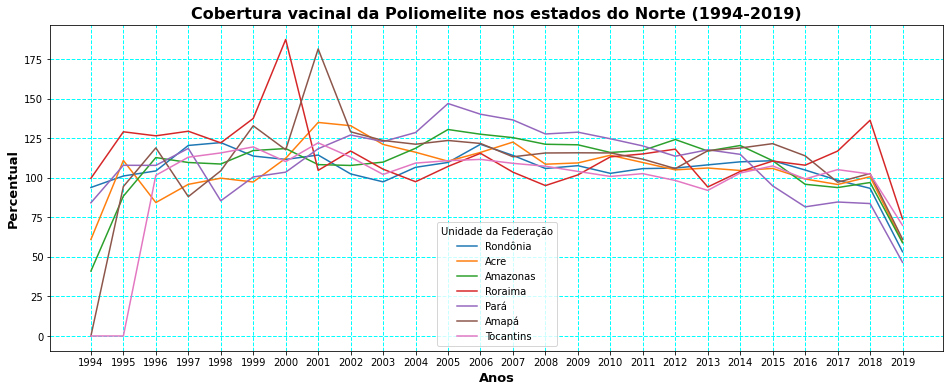

In [ ]:
ax = dados_polio[dados_polio['Região'] == 'Norte'].drop(['Região'], axis = 1).T.plot(figsize = (16,6))
rotulos = dados_geral[dados_geral['Região'] == 'Norte'].drop(['Região'], axis = 1).columns
plt.xticks(ticks= np.arange(start = min(rotulos), stop = max(rotulos)+1), labels= rotulos)
plt.grid(linestyle = '--', linewidth = 1, color = 'cyan')
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
plt.ylabel('Percentual', fontdict={'fontsize': 13, 'fontweight':'bold'})
plt.xlabel('Anos', fontdict={'fontsize': 13, 'fontweight':'bold'})
plt.title('Cobertura vacinal da Poliomelite nos estados do Norte (1994-2019)', fontdict={'fontsize': 16, 'fontweight':'bold'})
plt.show()

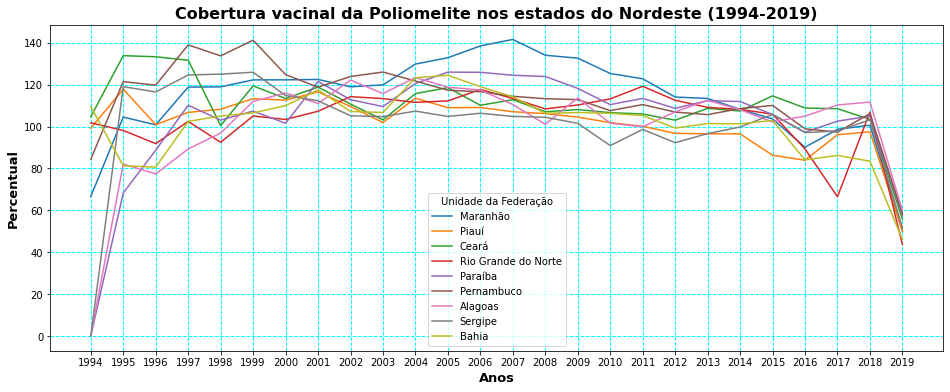

In [ ]:
ax = dados_polio[dados_polio['Região'] == 'Nordeste'].drop(['Região'], axis = 1).T.plot(figsize = (16,6))
rotulos = dados_geral[dados_geral['Região'] == 'Nordeste'].drop(['Região'], axis = 1).columns
plt.xticks(ticks= np.arange(start = min(rotulos), stop = max(rotulos)+1), labels= rotulos)
plt.grid(linestyle = '--', linewidth = 1, color = 'cyan')
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
plt.ylabel('Percentual', fontdict={'fontsize': 13, 'fontweight':'bold'})
plt.xlabel('Anos', fontdict={'fontsize': 13, 'fontweight':'bold'})
plt.title('Cobertura vacinal da Poliomelite nos estados do Nordeste (1994-2019)', fontdict={'fontsize': 16, 'fontweight':'bold'})
plt.show()

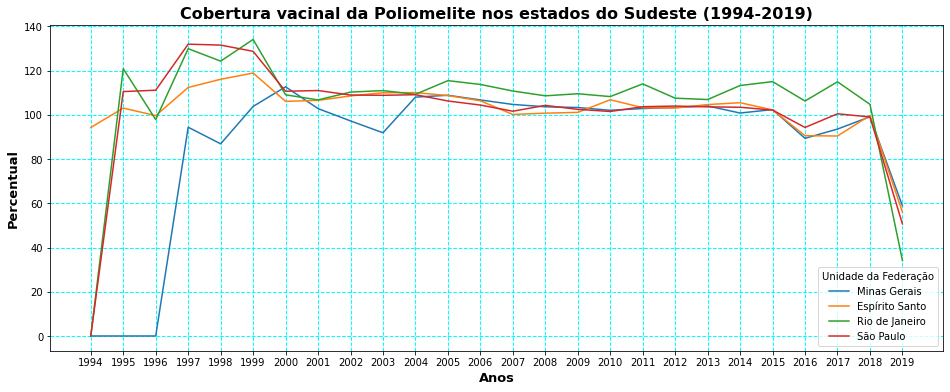

In [ ]:
ax = dados_polio[dados_polio['Região'] == 'Sudeste'].drop(['Região'], axis = 1).T.plot(figsize = (16,6))
rotulos = dados_geral[dados_geral['Região'] == 'Sudeste'].drop(['Região'], axis = 1).columns
plt.xticks(ticks= np.arange(start = min(rotulos), stop = max(rotulos)+1), labels= rotulos)
plt.grid(linestyle = '--', linewidth = 1, color = 'cyan')
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
plt.ylabel('Percentual', fontdict={'fontsize': 13, 'fontweight':'bold'})
plt.xlabel('Anos', fontdict={'fontsize': 13, 'fontweight':'bold'})
plt.title('Cobertura vacinal da Poliomelite nos estados do Sudeste (1994-2019)', fontdict={'fontsize': 16, 'fontweight':'bold'})
plt.show()

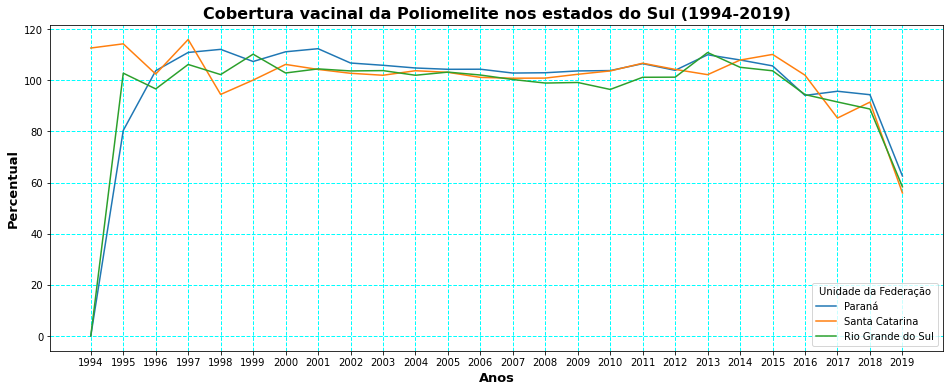

In [ ]:
ax = dados_polio[dados_polio['Região'] == 'Sul'].drop(['Região'], axis = 1).T.plot(figsize = (16,6))
rotulos = dados_geral[dados_geral['Região'] == 'Sul'].drop(['Região'], axis = 1).columns
plt.xticks(ticks= np.arange(start = min(rotulos), stop = max(rotulos)+1), labels= rotulos)
plt.grid(linestyle = '--', linewidth = 1, color = 'cyan')
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
plt.ylabel('Percentual', fontdict={'fontsize': 13, 'fontweight':'bold'})
plt.xlabel('Anos', fontdict={'fontsize': 13, 'fontweight':'bold'})
plt.title('Cobertura vacinal da Poliomelite nos estados do Sul (1994-2019)', fontdict={'fontsize': 16, 'fontweight':'bold'})
plt.show()

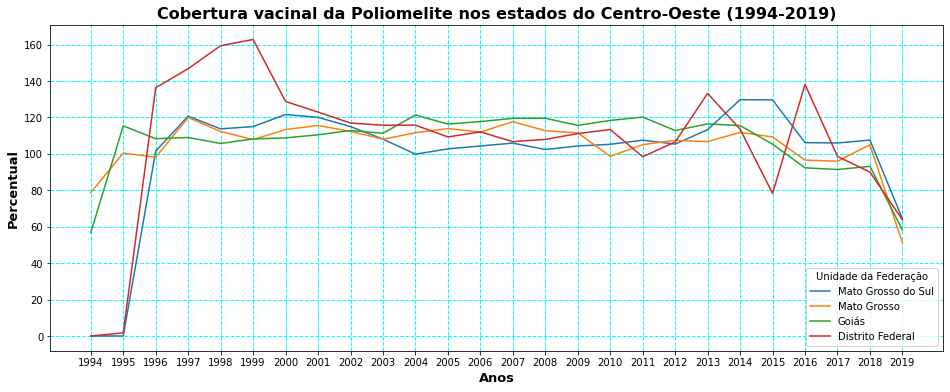

In [ ]:
ax = dados_polio[dados_polio['Região'] == 'Centro-Oeste'].drop(['Região'], axis = 1).T.plot(figsize = (16,6))
rotulos = dados_geral[dados_geral['Região'] == 'Centro-Oeste'].drop(['Região'], axis = 1).columns
plt.xticks(ticks= np.arange(start = min(rotulos), stop = max(rotulos)+1), labels= rotulos)
plt.grid(linestyle = '--', linewidth = 1, color = 'cyan')
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
plt.ylabel('Percentual', fontdict={'fontsize': 13, 'fontweight':'bold'})
plt.xlabel('Anos', fontdict={'fontsize': 13, 'fontweight':'bold'})
plt.title('Cobertura vacinal da Poliomelite nos estados do Centro-Oeste (1994-2019)', fontdict={'fontsize': 16, 'fontweight':'bold'})
plt.show()

# Identificando as maiores quedas

Nessa sessão vamos analizar ainda mais variações nas coberturas vacinais, metrificando de forma precisa as quedas observadas nos gráficos anteriores.

## Variação por Imuno

In [ ]:
var_por_imuno = pd.DataFrame()
for ano in range(1995,2020):
  var_por_imuno[ano] = (dados_imuno[ano] / dados_imuno[ano -1] - 1)*100


In [ ]:
var_por_imuno

1995  1996  ...   2018   2019
Imuno                                                   ...              
 BCG                                       17.36  0.55  ...   0.62 -45.81
 Hepatite B  em crianças até 30 dias         nan   nan  ...   1.80 -44.28
 Rotavírus Humano                            nan   nan  ...   6.04 -41.54
 Meningococo C                               nan   nan  ...   0.53 -38.67
 Hepatite B                                18.64 57.14  ...   7.67 -39.80
 Penta                                       nan   nan  ...   3.96 -42.90
 Pneumocócica                                nan   nan  ...   2.04 -41.74
 Poliomielite                              33.64  3.89  ...   4.63 -41.54
 Poliomielite 4 anos                         nan   nan  ... -24.19 -59.57
 Febre Amarela                             -8.73 17.46  ...  25.70 -31.66
 Hepatite A                                  nan   nan  ...  -1.07 -36.60
 Pneumocócica(1º ref)                        nan   nan  ...   0.45 -36.89
 Meningococo C (1º ref)                      nan   nan  ...  -2.93 -30.81
 Poliomielite(1º ref)                        nan   nan  ...  -7.89 -36.18
 Tríplice Viral  D1                          nan   nan  ...   1.14 -37.76
 Tríplice Viral  D2                          nan   nan  ...   0.05 -36.76
 Tetra Viral(SRC+VZ)                         nan   nan  ... -11.94 -30.81
 DTP                                       24.37 -2.84  ...   3.92 -42.89
 DTP REF (4 e 6 anos)                        nan   nan  ... -31.32 -48.19
 Tríplice Bacteriana(DTP)(1º ref)            nan   nan  ...  -9.15 -42.66
 Sarampo                                   21.72 -7.44  ...    nan    nan
 Haemophilus influenzae b                    nan   inf  ...    nan    nan
 Dupla adulto e tríplice acelular gestante   nan   nan  ...  36.05 -34.64
 dTpa gestante                               nan   nan  ...  48.87 -33.44

[24 rows x 25 columns]

Podemos os imunizantes que apresentaram maiores quedas de 2018 a 2019 na forma de tabela:

In [ ]:
var_por_imuno.sort_values(by = 2019, ascending= True)[2019]

Imuno
 Poliomielite 4 anos                         -59.57
 DTP REF (4 e 6 anos)                        -48.19
 BCG                                         -45.81
 Hepatite B  em crianças até 30 dias         -44.28
 Penta                                       -42.90
 DTP                                         -42.89
 Tríplice Bacteriana(DTP)(1º ref)            -42.66
 Pneumocócica                                -41.74
 Poliomielite                                -41.54
 Rotavírus Humano                            -41.54
 Hepatite B                                  -39.80
 Meningococo C                               -38.67
 Tríplice Viral  D1                          -37.76
 Pneumocócica(1º ref)                        -36.89
 Tríplice Viral  D2                          -36.76
 Hepatite A                                  -36.60
 Poliomielite(1º ref)                        -36.18
 Dupla adulto e tríplice acelular gestante   -34.64
 dTpa gestante                               -33.44
 Febre

Ou plotar em um gráfico de barras para visualizar os mesmos dados:

In [ ]:
maiores_quedas_2019 = var_por_imuno.sort_values(by = 2019, ascending= True)[2019][0:10]

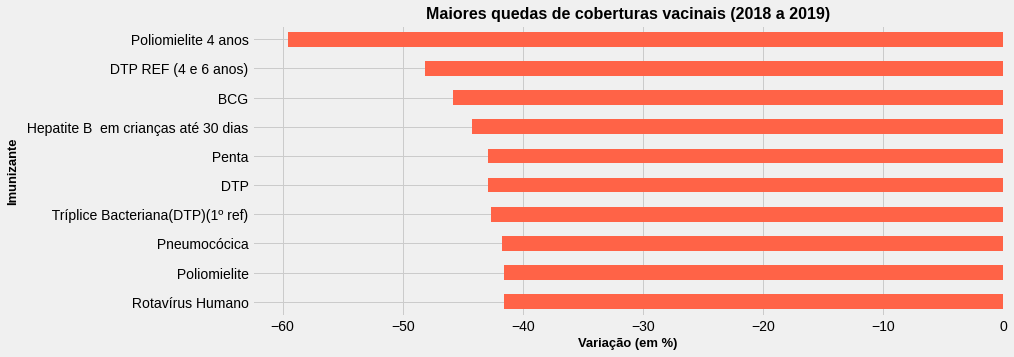

In [ ]:
ax = maiores_quedas_2019.plot(kind = 'barh', figsize = (12,5), color = 'tomato')
plt.gca().invert_yaxis()
plt.style.use('fivethirtyeight')
plt.title('Maiores quedas de coberturas vacinais (2018 a 2019)', fontdict= {'fontsize':16, 'fontweight':'bold'})
plt.xlabel('Variação (em %)',fontdict= {'fontsize':13, 'fontweight':'bold'})
plt.ylabel('Imunizante', fontdict= {'fontsize':13, 'fontweight':'bold'})
plt.show()

Novamente, observa-se que importantes vacinas infantis como poliomelite, BCG e tríplice bacteriana figuram entre os imunizantes com maiores percentuais de queda em um único ano. São quedas de mais de 40%, o que é uma informação muito alarmante. Se não forem tomadas medidas governamentais cabíveis, tal tendência pode levar a um potencial cenário de calamidade sanitária. 

Vejamos de quanto foi essa queda, na média:

In [ ]:
queda  = var_por_imuno[2019].replace([np.inf, -np.inf], np.nan).dropna().mean()
print('As coberturas vacinais tiveram uma queda média de ', queda, '% de 2018 para 2019')

NameError: ignored

In [ ]:
var_por_imuno.replace([np.inf, -np.inf], np.nan).dropna().describe()

1995  1996   1997   1998   1999  ...  2015   2016   2017  2018   2019
count  5.00  5.00   5.00   5.00   5.00  ...  5.00   5.00   5.00  5.00   5.00
mean  17.06 15.24  -0.60  54.89 125.79  ...  0.24  -5.37  -3.69  8.51 -40.34
std   15.78 24.66  38.65  66.62 244.47  ...  1.72   8.16   8.84  9.93   5.33
min   -8.73 -2.84 -64.91  -4.70   1.60  ... -2.05 -14.10 -17.97  0.62 -45.81
25%   17.36  0.55   0.33   6.75   3.97  ... -1.17  -9.07  -6.15  3.92 -42.89
50%   18.64  3.89  10.41  18.43   5.08  ...  1.37  -7.61  -0.19  4.63 -41.54
75%   24.37 17.46  12.41 118.13  57.17  ...  1.49  -3.71   1.64  7.67 -39.80
max   33.64 57.14  38.76 135.84 561.12  ...  1.58   7.62   4.19 25.70 -31.66

[8 rows x 25 columns]

Vejamos como essas variações oscilaram de 1994 a 2019

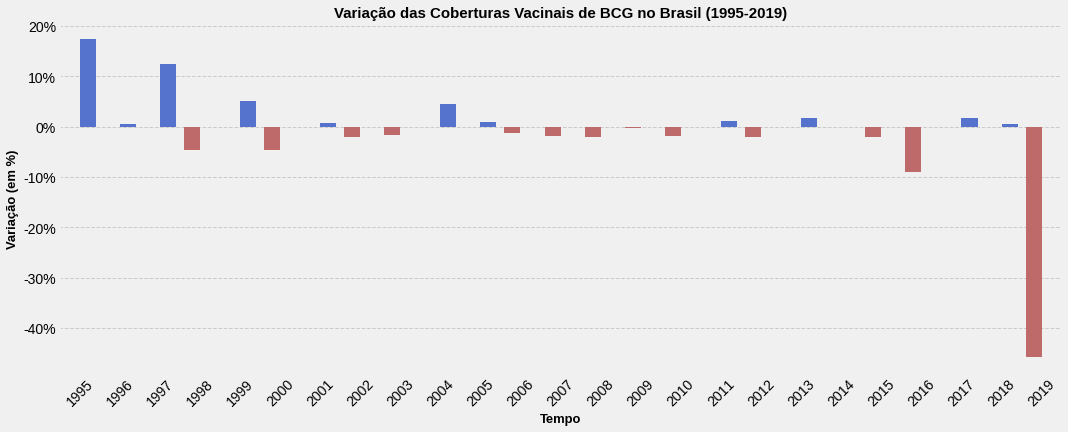

In [ ]:
bcg_var = pd.DataFrame()
bcg_var['Valor'] = var_por_imuno.iloc[0]
bcg_var['cor'] = [1 if c >= 0 else 0 for c in bcg_var['Valor']]
plt.figure(figsize=(16,6))
ax = sns.barplot(y = bcg_var['Valor'], 
                 x = var_por_imuno.columns,
                 hue = bcg_var['cor'], 
                 palette= ['indianred', 'royalblue'])

plt.grid(axis = 'y', linestyle = '--')
plt.title('Variação das Coberturas Vacinais de BCG no Brasil (1995-2019)', fontdict= {'fontsize':15, 'fontweight':'bold'})
plt.xlabel('Tempo', fontdict= {'fontsize':13, 'fontweight':'bold'})
plt.ylabel('Variação (em %)', fontdict= {'fontsize':13, 'fontweight':'bold'})
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%d%%'))
plt.xticks(rotation = 45)
plt.legend('')
plt.show()

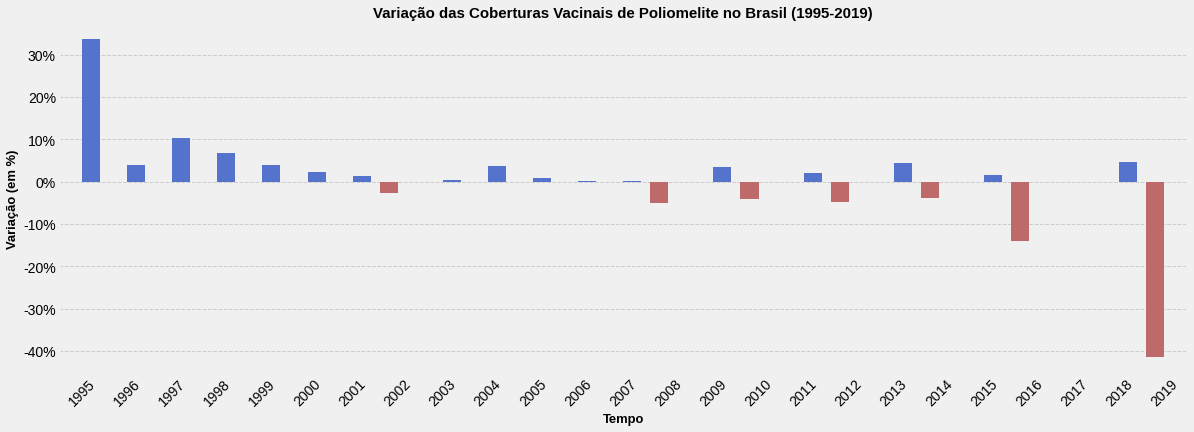

In [ ]:
polio_var = pd.DataFrame()
polio_var['Valor'] = var_por_imuno.iloc[7]
polio_var['cor'] = [1 if c >= 0 else 0 for c in polio_var['Valor']]
plt.figure(figsize=(18,6))
ax = sns.barplot(y = polio_var['Valor'], 
                 x = var_por_imuno.columns,
                 hue = polio_var['cor'], 
                 palette= ['indianred', 'royalblue'])

plt.grid(axis = 'y', linestyle = '--')
plt.title('Variação das Coberturas Vacinais de Poliomelite no Brasil (1995-2019)', fontdict= {'fontsize':15, 'fontweight':'bold'})
plt.xlabel('Tempo', fontdict= {'fontsize':13, 'fontweight':'bold'})
plt.ylabel('Variação (em %)', fontdict= {'fontsize':13, 'fontweight':'bold'})
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%d%%'))
plt.xticks(rotation = 45)
plt.legend('')

plt.show()

## Variação por UF

In [ ]:
var_por_UF = pd.DataFrame()
for ano in range(1995,2020):
  var_por_UF[ano] = (dados_geral[ano] / dados_geral[ano -1] - 1)*100

In [ ]:
var_por_UF.insert(0,'Região', dados_geral['Região'])

In [ ]:
var_por_UF

Região   1995      1996  ...  2017  2018   2019
Unidade da Federação                                 ...                   
Rondônia                     Norte  18.80     49.70  ... 26.61  2.12 -37.61
Acre                         Norte 127.03    -21.50  ... 32.55  8.46 -32.62
Amazonas                     Norte  77.77     39.25  ... 35.34  6.87 -28.43
Roraima                      Norte  38.68      0.38  ... 29.35  6.06 -39.00
Pará                         Norte  23.64     27.80  ... 39.03 -0.28 -34.66
Amapá                        Norte    inf     29.04  ...  3.60  7.94 -30.48
Tocantins                    Norte    nan       inf  ... 34.07  0.76 -30.04
Maranhão                  Nordeste  30.11     15.02  ... 40.32  5.98 -37.92
Piauí                     Nordeste -22.60     -3.65  ... 43.27  5.28 -36.61
Ceará                     Nordeste   1.75     20.42  ... 30.53  5.02 -38.57
Rio Grande do Norte       Nordeste  19.09     14.91  ... 27.14 25.80 -43.59
Paraíba                   Nordeste    inf     98.20  ... 32.04  4.96 -36.81
Pernambuco                Nordeste 133.14     -6.60  ... 26.77  8.02 -36.23
Alagoas                   Nordeste    inf     64.30  ... 44.85  8.89 -37.48
Sergipe                   Nordeste    inf     -0.56  ... 34.94  8.30 -32.80
Bahia                     Nordeste -34.41     34.87  ... 42.30  0.62 -39.09
Minas Gerais               Sudeste    nan       nan  ... 39.67  6.22 -37.45
Espírito Santo             Sudeste  35.66      0.95  ... 29.62 11.86 -34.36
Rio de Janeiro             Sudeste    inf    -16.24  ... 39.72 -8.46 -57.65
São Paulo                  Sudeste    inf     -0.33  ... 46.47  6.29 -35.43
Paraná                         Sul    inf     46.86  ... 40.38  5.32 -28.95
Santa Catarina                 Sul   7.50    -12.51  ... 28.77  8.72 -26.50
Rio Grande do Sul              Sul    inf     -9.73  ... 34.68  3.31 -31.08
Mato Grosso do Sul    Centro-Oeste    nan       inf  ... 24.01  5.98 -37.49
Mato Grosso           Centro-Oeste  18.61     -0.61  ... 27.37  3.26 -39.53
Goiás                 Centro-Oeste 212.07     -4.13  ... 36.66 -1.91 -34.53
Distrito Federal      Centro-Oeste    inf 16,367.65  ... -1.94  0.04 -32.86

[27 rows x 26 columns]

Vejamos a variação do Distrito Federal, o UF que apresentou comportamento destoante dos outros:

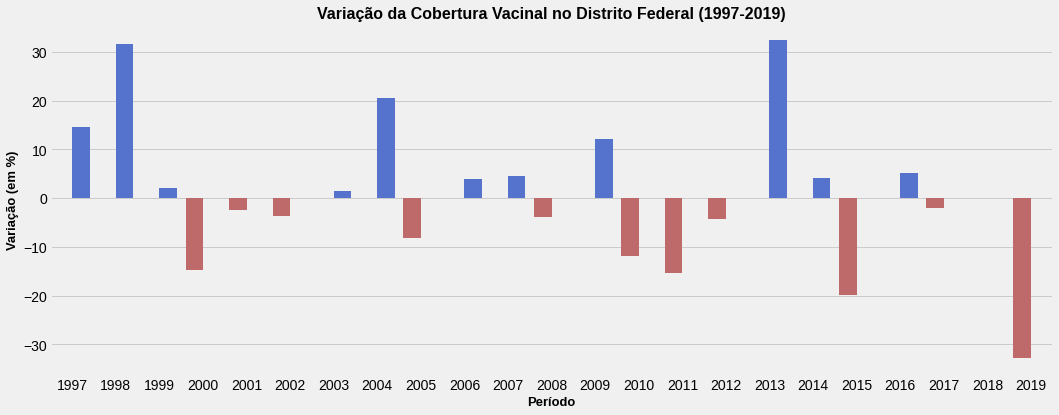

In [ ]:
var_DF = pd.DataFrame(var_por_UF.drop(['Região', 1995, 1996], axis = 1).T['Distrito Federal'])
var_DF['cor'] = [1 if c >= 0 else 0 for c in var_DF['Distrito Federal']]
plt.figure(figsize=(16,6))
ax = sns.barplot(data = var_DF, y = var_DF['Distrito Federal'], x = var_DF.index,
                 hue = var_DF['cor'], 
                 palette= ['indianred', 'royalblue'])
plt.legend('')
plt.title('Variação da Cobertura Vacinal no Distrito Federal (1997-2019)', fontdict={'fontsize': 16, 'fontweight':'bold'})
plt.xlabel('Período', fontdict={'fontsize': 13, 'fontweight':'bold'})
plt.ylabel('Variação (em %)', fontdict={'fontsize': 13, 'fontweight':'bold'})
plt.show()

In [ ]:
var_por_regiao = var_por_UF.groupby('Região').mean()
var_por_regiao

1995  1996  1997  1998  1999  ...  2015   2016  2017  2018   2019
Região                                      ...                                
Centro-Oeste   inf   inf 49.63 11.87 13.21  ... -0.23 -30.79 21.52  1.84 -36.10
Nordeste       inf 26.32 25.65  1.69 29.75  ...  9.61 -48.83 35.80  8.10 -37.68
Norte          inf   inf 23.11 18.02  7.58  ... 15.86 -40.58 28.65  4.56 -33.26
Sudeste        inf -5.21   inf  6.97 22.60  ... 11.38 -48.52 38.87  3.98 -41.22
Sul            inf  8.20 36.37 -7.40 23.30  ...  8.25 -40.91 34.61  5.78 -28.84

[5 rows x 25 columns]

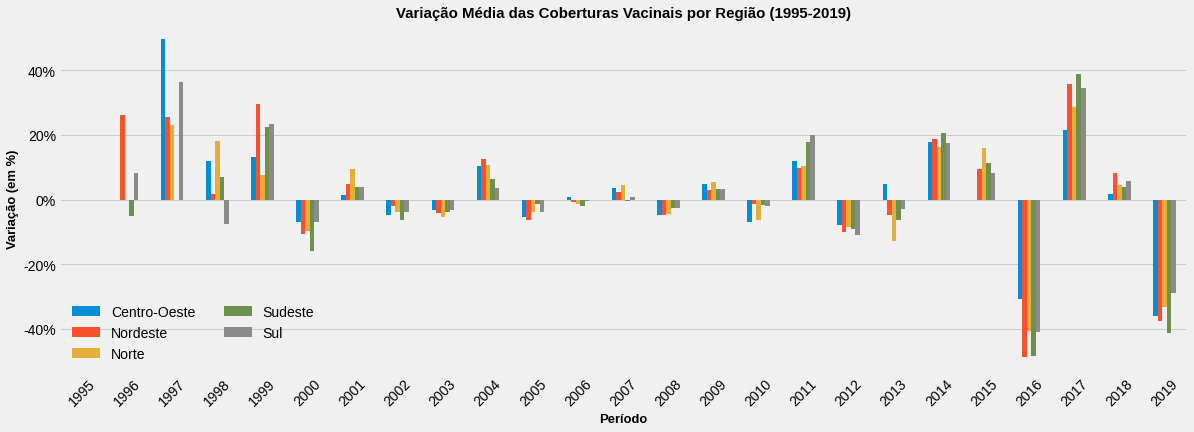

In [ ]:
ax = var_por_regiao.T.plot(kind = 'bar', figsize = (18,6))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%d%%'))
plt.title('Variação Média das Coberturas Vacinais por Região (1995-2019)', fontdict= {'fontsize':15, 'fontweight':'bold'})
plt.ylabel('Variação (em %)', fontdict= {'fontsize':13, 'fontweight':'bold'})
plt.xlabel('Período', fontdict= {'fontsize':13, 'fontweight':'bold'})
plt.xticks(rotation = 45)
plt.style.use('fivethirtyeight')
plt.grid(axis = 'x')
plt.legend(ncol = 2)
plt.show()

# Casos de tuberculose

Para finalizar esse trabalho, vamos analizar os dados sobre o número de casos de tuberculose no Brasil. Como vimos nas sessões anteiores, a cobertura vacina de BCG caiu drasticamente desde 2015. Claro, a maior queda foi registrada em 2019, então os possíveis efeitos desse movimento de diminuição da imunização só serão observados em anos futuros. Mas a análise inicial já será reveladora.

## Casos totais

Vamos começar com os casos totais, considerando todas as idades.

In [ ]:
dados_tuber = pd.read_csv('/content/casos_tuberculose.csv', sep = ';', decimal= ',', encoding= 'ISO-8859-1',
                          skiprows = 3, skipfooter = 20)
dados_tuber

UF de notificação   2001   2002   2003  ...   2017   2018   2019   Total
0              11 Rondônia    674    639    651  ...    780    678    740   12517
1                  12 Acre    364    368    368  ...    484    483    582    7544
2              13 Amazonas   2334   2286   2375  ...   3693   3803   3955   54827
3               14 Roraima    150    172    206  ...    205    265    324    3388
4                  15 Pará   3517   3785   3940  ...   4511   4678   5542   78245
5                 16 Amapá    223    296    273  ...    298    284    357    4993
6             17 Tocantins    320    333    284  ...    187    233    234    4420
7              21 Maranhão   2901   3043   2980  ...   2469   2647   2666   49621
8                 22 Piauí   1568   1519   1448  ...    791    884    877   21400
9                 23 Ceará   4240   4385   4586  ...   4289   4555   4544   82091
10  24 Rio Grande do Norte   1158   1179   1354  ...   1354   1624   1417   23870
11              25 Paraíba   1369   1395   1465  ...   1360   1542   1486   25927
12           26 Pernambuco   4542   4870   5153  ...   6378   6491   6793  103039
13              27 Alagoas   1332   1351   1426  ...   1264   1340   1288   25448
14              28 Sergipe    557    599    664  ...    832    978   1022   13776
15                29 Bahia   7935   7853   8435  ...   5498   5667   5653  125620
16         31 Minas Gerais   1331   5886   5982  ...   4064   4224   4356   88421
17       32 Espírito Santo   1658   1569   1563  ...   1324   1484   1492   27536
18       33 Rio de Janeiro  16976  16789  16130  ...  13927  14819  14963  278279
19            35 São Paulo  19775  19807  19202  ...  22119  22258  21953  370549
20               41 Paraná   3224   3436   3454  ...   2501   2860   2883   54892
21       42 Santa Catarina   1695   1873   1903  ...   2228   2282   2265   39075
22    43 Rio Grande do Sul   5231   5509   5786  ...   6599   6908   7642  115768
23   50 Mato Grosso do Sul    980    914   1022  ...   1140   1455   1406   20222
24          51 Mato Grosso   1425   1248   1267  ...   1430   1414   1532   26648
25                52 Goiás   1148   1149   1242  ...   1163   1212   1173   20405
26     53 Distrito Federal    638    606    614  ...    413    471    483   10054

[27 rows x 21 columns]

In [ ]:
dados_tuber.rename({'UF de notificação': 'Unidade da Federação'}, axis = 1, inplace= True) #necessário para aplicar a função criar_regioes()

In [ ]:
criar_regioes(dados_tuber)

                            Região      2001  ...      2018      2019
Unidade da Federação                          ...                    
Rondônia                     Norte    674.00  ...    678.00    740.00
Acre                         Norte    364.00  ...    483.00    582.00
Amazonas                     Norte  2,334.00  ...  3,803.00  3,955.00
Roraima                      Norte    150.00  ...    265.00    324.00
Pará                         Norte  3,517.00  ...  4,678.00  5,542.00
Amapá                        Norte    223.00  ...    284.00    357.00
Tocantins                    Norte    320.00  ...    233.00    234.00
Maranhão                  Nordeste  2,901.00  ...  2,647.00  2,666.00
Piauí                     Nordeste  1,568.00  ...    884.00    877.00
Ceará                     Nordeste  4,240.00  ...  4,555.00  4,544.00
Rio Grande do Norte       Nordeste  1,158.00  ...  1,624.00  1,417.00
Paraíba                   Nordeste  1,369.00  ...  1,542.00  1,486.00
Pernambuco          

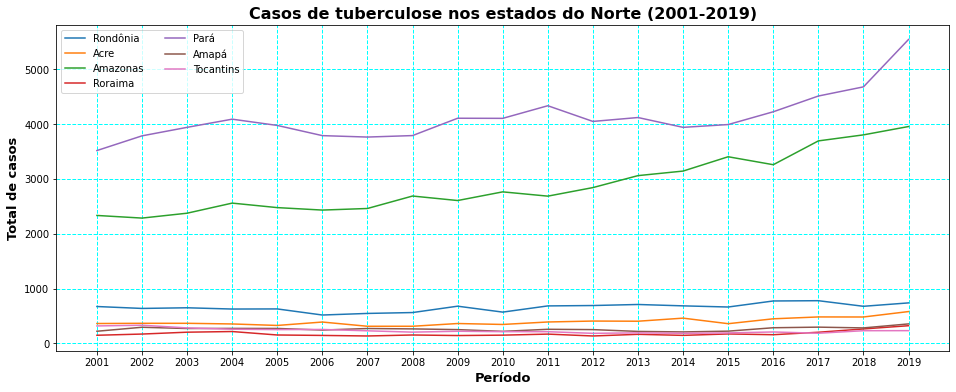

In [ ]:
ax = dados_tuber[dados_tuber['Região'] == 'Norte'].drop(['Região'], axis = 1).T.plot(figsize = (16,6))
rotulos = dados_tuber[dados_tuber['Região'] == 'Norte'].drop(['Região'], axis = 1).columns
plt.xticks(ticks= np.arange(start = min(rotulos), stop = max(rotulos)+1), labels= rotulos)
plt.grid(linestyle = '--', linewidth = 1, color = 'cyan')
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
plt.ylabel('Total de casos', fontdict={'fontsize': 13, 'fontweight':'bold'})
plt.xlabel('Período', fontdict={'fontsize': 13, 'fontweight':'bold'})
plt.title('Casos de tuberculose nos estados do Norte (2001-2019)', fontdict={'fontsize': 16, 'fontweight':'bold'})
plt.legend(ncol = 2)
plt.show()

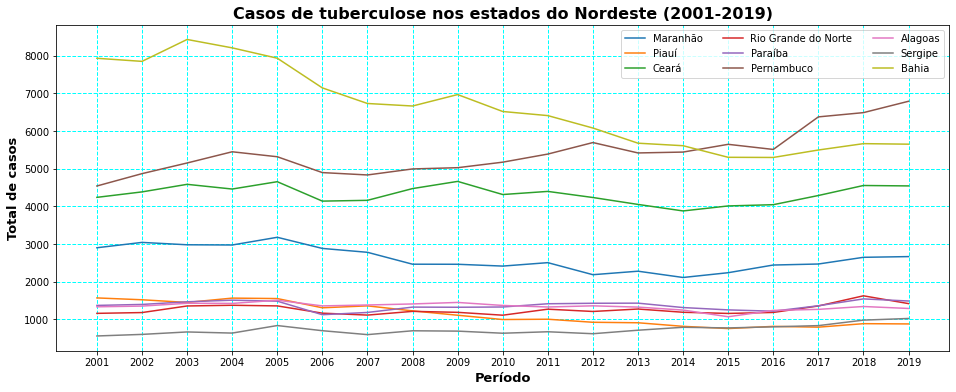

In [ ]:
ax = dados_tuber[dados_tuber['Região'] == 'Nordeste'].drop(['Região'], axis = 1).T.plot(figsize = (16,6))
rotulos = dados_tuber[dados_tuber['Região'] == 'Nordeste'].drop(['Região'], axis = 1).columns
plt.xticks(ticks= np.arange(start = min(rotulos), stop = max(rotulos)+1), labels= rotulos)
plt.grid(linestyle = '--', linewidth = 1, color = 'cyan')
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
plt.ylabel('Total de casos', fontdict={'fontsize': 13, 'fontweight':'bold'})
plt.xlabel('Período', fontdict={'fontsize': 13, 'fontweight':'bold'})
plt.title('Casos de tuberculose nos estados do Nordeste (2001-2019)', fontdict={'fontsize': 16, 'fontweight':'bold'})
plt.legend(ncol = 3)
plt.show()

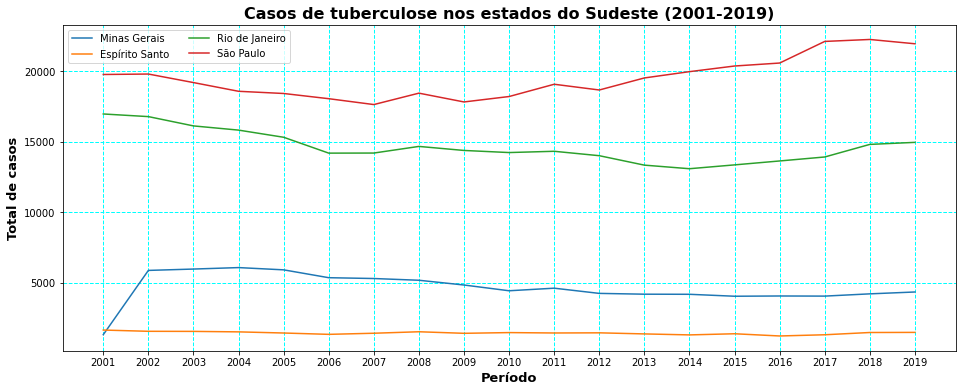

In [ ]:
ax = dados_tuber[dados_tuber['Região'] == 'Sudeste'].drop(['Região'], axis = 1).T.plot(figsize = (16,6))
rotulos = dados_tuber[dados_tuber['Região'] == 'Sudeste'].drop(['Região'], axis = 1).columns
plt.xticks(ticks= np.arange(start = min(rotulos), stop = max(rotulos)+1), labels= rotulos)
plt.grid(linestyle = '--', linewidth = 1, color = 'cyan')
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
plt.ylabel('Total de casos', fontdict={'fontsize': 13, 'fontweight':'bold'})
plt.xlabel('Período', fontdict={'fontsize': 13, 'fontweight':'bold'})
plt.title('Casos de tuberculose nos estados do Sudeste (2001-2019)', fontdict={'fontsize': 16, 'fontweight':'bold'})
plt.legend(ncol = 2)
plt.show()

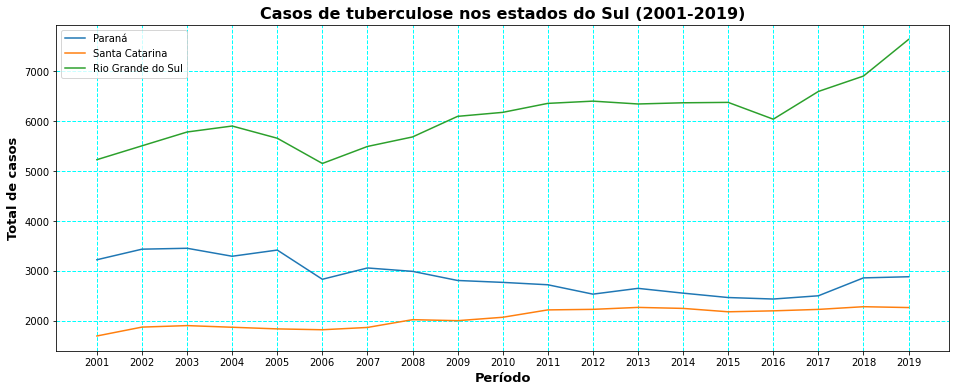

In [ ]:
ax = dados_tuber[dados_tuber['Região'] == 'Sul'].drop(['Região'], axis = 1).T.plot(figsize = (16,6))
rotulos = dados_tuber[dados_tuber['Região'] == 'Sul'].drop(['Região'], axis = 1).columns
plt.xticks(ticks= np.arange(start = min(rotulos), stop = max(rotulos)+1), labels= rotulos)
plt.grid(linestyle = '--', linewidth = 1, color = 'cyan')
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
plt.ylabel('Total de casos', fontdict={'fontsize': 13, 'fontweight':'bold'})
plt.xlabel('Período', fontdict={'fontsize': 13, 'fontweight':'bold'})
plt.title('Casos de tuberculose nos estados do Sul (2001-2019)', fontdict={'fontsize': 16, 'fontweight':'bold'})
plt.legend(ncol = 1)
plt.show()

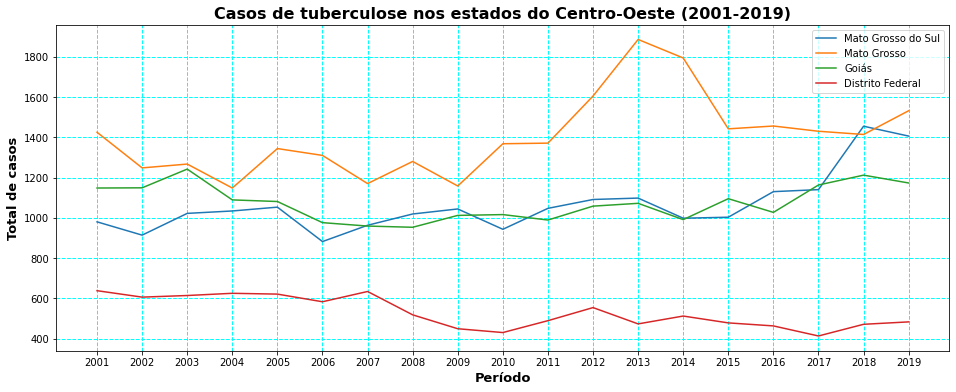

In [ ]:
ax = dados_tuber[dados_tuber['Região'] == 'Centro-Oeste'].drop(['Região'], axis = 1).T.plot(figsize = (16,6))
rotulos = dados_tuber[dados_tuber['Região'] == 'Centro-Oeste'].drop(['Região'], axis = 1).columns
plt.xticks(ticks= np.arange(start = min(rotulos), stop = max(rotulos)+1), labels= rotulos)
plt.grid(linestyle = '--', linewidth = 1, color = 'cyan')
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
plt.ylabel('Total de casos', fontdict={'fontsize': 13, 'fontweight':'bold'})
plt.xlabel('Período', fontdict={'fontsize': 13, 'fontweight':'bold'})
plt.title('Casos de tuberculose nos estados do Centro-Oeste (2001-2019)', fontdict={'fontsize': 16, 'fontweight':'bold'})
plt.legend(ncol = 1)
plt.show()

Notamos que parece haver um aumento dos casos de tuberculose a partir de 2015 (que é exatamente o mesmo ano em que as coberturas vacinais começaram a apresentar uma tendência de queda). 

### Agrupado por Região

Vejamos esses dados agrupados por região:

In [ ]:
casos_tuber_por_regiao = dados_tuber.groupby('Região').sum()
casos_tuber_por_regiao


2001      2002      2003  ...      2017      2018      2019
Região                                      ...                              
Centro-Oeste  4,191.00  3,917.00  4,145.00  ...  4,146.00  4,552.00  4,594.00
Nordeste     25,602.00 26,194.00 27,511.00  ... 24,235.00 25,728.00 25,746.00
Norte         7,582.00  7,879.00  8,097.00  ... 10,158.00 10,424.00 11,734.00
Sudeste      39,740.00 44,051.00 42,877.00  ... 41,434.00 42,785.00 42,764.00
Sul          10,150.00 10,818.00 11,143.00  ... 11,328.00 12,050.00 12,790.00

[5 rows x 19 columns]

Vamos plotar em gráficos separados para não termos problemas com escalas

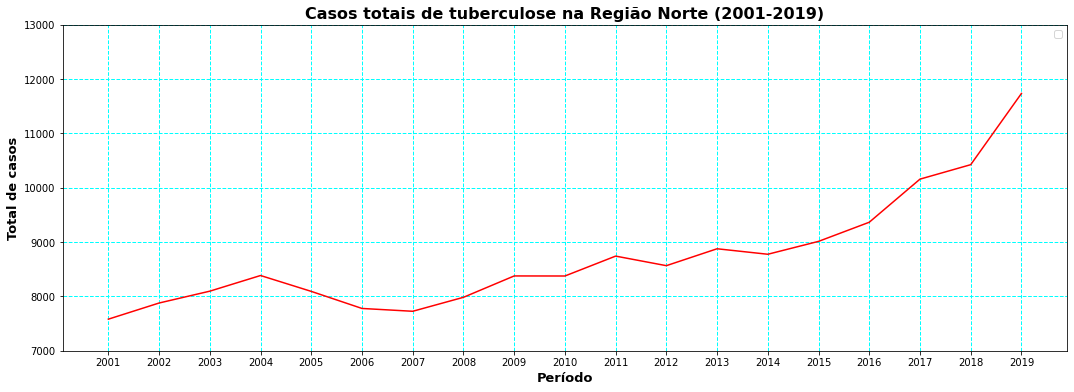

In [ ]:
ax = casos_tuber_por_regiao.iloc[2].plot(figsize = (18,6), color = 'r')
rotulos = dados_tuber[dados_tuber['Região'] == 'Norte'].drop(['Região'], axis = 1).columns
plt.xticks(ticks= np.arange(start = min(rotulos), stop = max(rotulos)+1), labels= rotulos)
plt.grid(linestyle = '--', linewidth = 1, color = 'cyan')
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
plt.ylabel('Total de casos', fontdict={'fontsize': 13, 'fontweight':'bold'})
plt.xlabel('Período', fontdict={'fontsize': 13, 'fontweight':'bold'})
plt.title('Casos totais de tuberculose na Região Norte (2001-2019)', fontdict={'fontsize': 16, 'fontweight':'bold'})
plt.legend('')
plt.ylim(7000,13000)
plt.show()

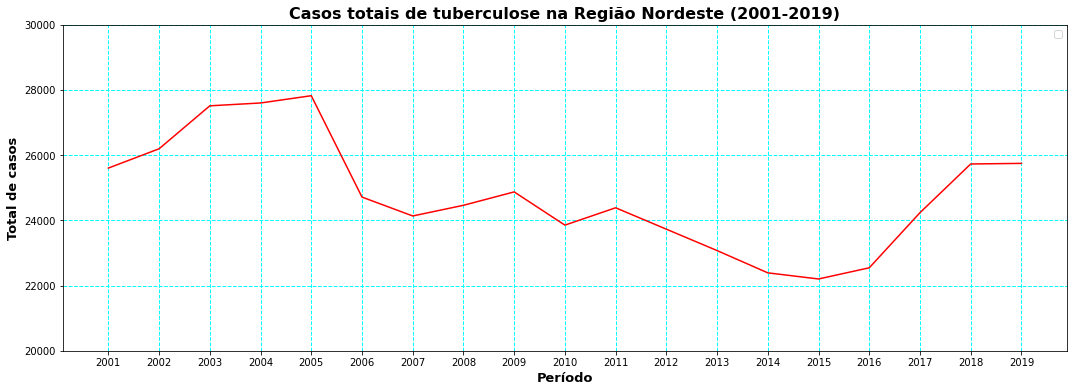

In [ ]:
ax = casos_tuber_por_regiao.iloc[1].plot(figsize = (18,6), color = 'r')
rotulos = dados_tuber[dados_tuber['Região'] == 'Nordeste'].drop(['Região'], axis = 1).columns
plt.xticks(ticks= np.arange(start = min(rotulos), stop = max(rotulos)+1), labels= rotulos)
plt.grid(linestyle = '--', linewidth = 1, color = 'cyan')
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
plt.ylabel('Total de casos', fontdict={'fontsize': 13, 'fontweight':'bold'})
plt.xlabel('Período', fontdict={'fontsize': 13, 'fontweight':'bold'})
plt.title('Casos totais de tuberculose na Região Nordeste (2001-2019)', fontdict={'fontsize': 16, 'fontweight':'bold'})
plt.legend('')
plt.ylim(20000,30000)
plt.show()

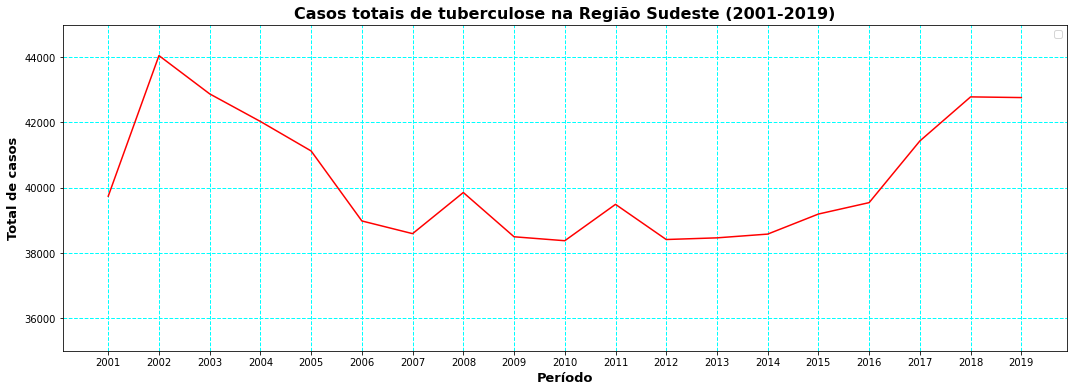

In [ ]:
ax = casos_tuber_por_regiao.iloc[3].plot(figsize = (18,6), color = 'r')
rotulos = dados_tuber[dados_tuber['Região'] == 'Sudeste'].drop(['Região'], axis = 1).columns
plt.xticks(ticks= np.arange(start = min(rotulos), stop = max(rotulos)+1), labels= rotulos)
plt.grid(linestyle = '--', linewidth = 1, color = 'cyan')
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
plt.ylabel('Total de casos', fontdict={'fontsize': 13, 'fontweight':'bold'})
plt.xlabel('Período', fontdict={'fontsize': 13, 'fontweight':'bold'})
plt.title('Casos totais de tuberculose na Região Sudeste (2001-2019)', fontdict={'fontsize': 16, 'fontweight':'bold'})
plt.legend('')
plt.ylim(35000,45000)
plt.show()

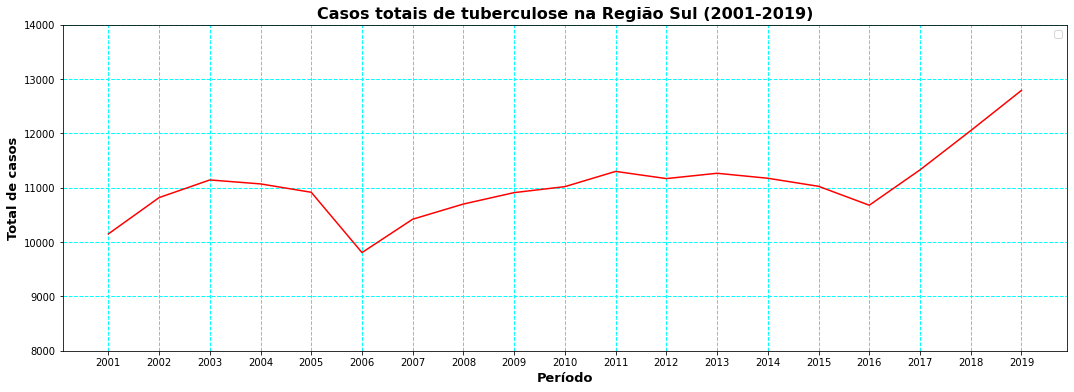

In [ ]:
ax = casos_tuber_por_regiao.iloc[4].plot(figsize = (18,6), color = 'r')
rotulos = dados_tuber[dados_tuber['Região'] == 'Sudeste'].drop(['Região'], axis = 1).columns
plt.xticks(ticks= np.arange(start = min(rotulos), stop = max(rotulos)+1), labels= rotulos)
plt.grid(linestyle = '--', linewidth = 1, color = 'cyan')
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
plt.ylabel('Total de casos', fontdict={'fontsize': 13, 'fontweight':'bold'})
plt.xlabel('Período', fontdict={'fontsize': 13, 'fontweight':'bold'})
plt.title('Casos totais de tuberculose na Região Sul (2001-2019)', fontdict={'fontsize': 16, 'fontweight':'bold'})
plt.legend('')
plt.ylim(8000,14000)
plt.show()

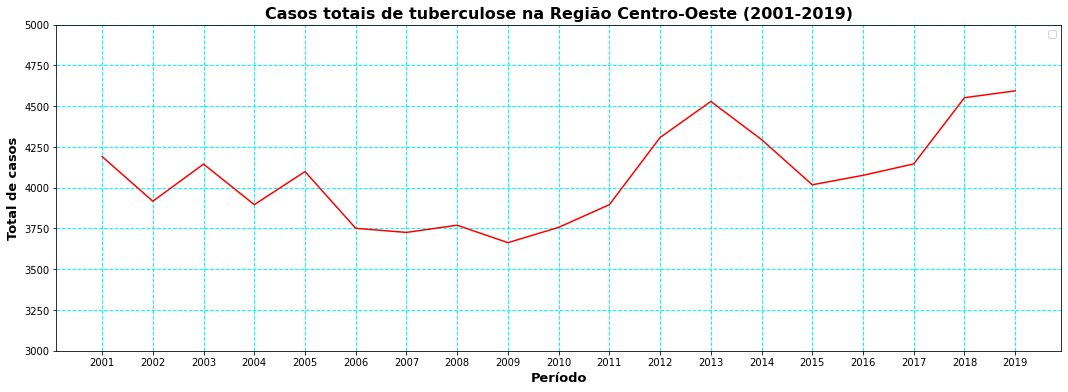

In [ ]:
ax = casos_tuber_por_regiao.iloc[0].plot(figsize = (18,6), color = 'r')
rotulos = dados_tuber[dados_tuber['Região'] == 'Sudeste'].drop(['Região'], axis = 1).columns
plt.xticks(ticks= np.arange(start = min(rotulos), stop = max(rotulos)+1), labels= rotulos)
plt.grid(linestyle = '--', linewidth = 1, color = 'cyan')
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
plt.ylabel('Total de casos', fontdict={'fontsize': 13, 'fontweight':'bold'})
plt.xlabel('Período', fontdict={'fontsize': 13, 'fontweight':'bold'})
plt.title('Casos totais de tuberculose na Região Centro-Oeste (2001-2019)', fontdict={'fontsize': 16, 'fontweight':'bold'})
plt.legend('')
plt.ylim(3000,5000)
plt.show()

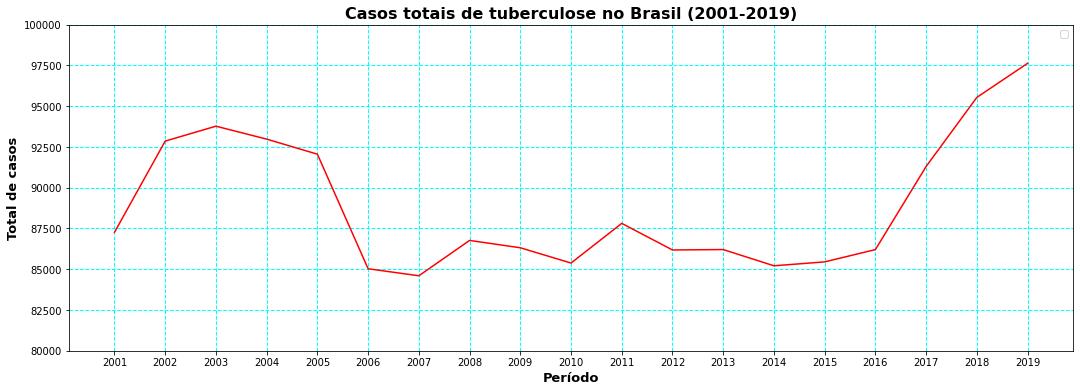

In [ ]:
ax = dados_tuber.drop('Região', axis =1).sum().plot(figsize = (18,6), color = 'r')
rotulos = dados_tuber[dados_tuber['Região'] == 'Sudeste'].drop(['Região'], axis = 1).columns
plt.xticks(ticks= np.arange(start = min(rotulos), stop = max(rotulos)+1), labels= rotulos)
plt.grid(linestyle = '--', linewidth = 1, color = 'cyan')
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
plt.ylabel('Total de casos', fontdict={'fontsize': 13, 'fontweight':'bold'})
plt.xlabel('Período', fontdict={'fontsize': 13, 'fontweight':'bold'})
plt.title('Casos totais de tuberculose no Brasil (2001-2019)', fontdict={'fontsize': 16, 'fontweight':'bold'})
plt.legend('')
plt.ylim(80000,100000)
plt.show()

É assustado observar graficamente os números dessa doença aumentarem de forma tão acentuada. 

## Infantil

Faremos a mesma análise anterior, mas agora vamos nos restringir a casos de tuberculose em crianças com até 4 anos. 

In [ ]:
dados_tuber_infanto = pd.read_csv('/content/casos_tuberculose_infantil.csv', sep = ';', decimal= ',', encoding= 'ISO-8859-1',
                          skiprows = 4, skipfooter = 19)
dados_tuber_infanto

UF de notificação  2001  2002  2003  2004  ...  2018  2019 2020  2021  Total
0              11 Rondônia    26    16    25    10  ...     5     6    1     -    212
1                  12 Acre    12    10     9    11  ...     3     4    -     -    120
2              13 Amazonas    72    65    85    67  ...    67    78    4     1   1169
3               14 Roraima     2     4     2     9  ...     6     7    -     -     77
4                  15 Pará    47    58    52    57  ...    68    69    1     -   1013
5                 16 Amapá     5     7     4     5  ...     5     2    -     -     86
6             17 Tocantins     2    10     5    12  ...     3     6    -     -     67
7              21 Maranhão    47    59    61    52  ...    26    20    1     -    684
8                 22 Piauí    12     9     7    31  ...    10     8    -     -    223
9                 23 Ceará    39    56   103    65  ...    45    44    4     -   1016
10  24 Rio Grande do Norte    19    25    25    35  ...    23    22    1     -    380
11              25 Paraíba    29    25    39    37  ...    25    20    1     -    387
12           26 Pernambuco    46    77   133   103  ...   104   115    3     -   1619
13              27 Alagoas    15    25    19    16  ...    15    30    -     -    311
14              28 Sergipe     4     4     3     3  ...     4     4    -     -     67
15                29 Bahia   126   128   154   109  ...    43    55    -     -   1612
16         31 Minas Gerais    33   109    77    77  ...    49    53    -     -    893
17       32 Espírito Santo    30    47    36    42  ...     9    18    -     -    433
18       33 Rio de Janeiro   306   265   206   194  ...   127   185    5     -   3433
19            35 São Paulo   233   199   170   158  ...   225   258    6     1   3567
20               41 Paraná    44    44    54    59  ...    31    39    5     -    672
21       42 Santa Catarina    19    34    28    23  ...    32    25    1     -    400
22    43 Rio Grande do Sul    88    74    67    69  ...    77    63    6     -   1162
23   50 Mato Grosso do Sul    28    50    36    42  ...    23    13    1     -    419
24          51 Mato Grosso    60    56    40    40  ...    35    47    2     -    734
25                52 Goiás    16    17    20    23  ...     8     7    -     -    230
26     53 Distrito Federal    27    27    30    19  ...     3     7    -     -    242

[27 rows x 23 columns]

In [ ]:
dados_tuber_infanto.rename({'UF de notificação': 'Unidade da Federação'}, axis = 1, inplace= True)

In [ ]:
criar_regioes(dados_tuber_infanto)

                            Região   2001   2002  ...   2019  2020  2021
Unidade da Federação                              ...                   
Rondônia                     Norte  26.00  16.00  ...   6.00  1.00  0.00
Acre                         Norte  12.00  10.00  ...   4.00  0.00  0.00
Amazonas                     Norte  72.00  65.00  ...  78.00  4.00  1.00
Roraima                      Norte   2.00   4.00  ...   7.00  0.00  0.00
Pará                         Norte  47.00  58.00  ...  69.00  1.00  0.00
Amapá                        Norte   5.00   7.00  ...   2.00  0.00  0.00
Tocantins                    Norte   2.00  10.00  ...   6.00  0.00  0.00
Maranhão                  Nordeste  47.00  59.00  ...  20.00  1.00  0.00
Piauí                     Nordeste  12.00   9.00  ...   8.00  0.00  0.00
Ceará                     Nordeste  39.00  56.00  ...  44.00  4.00  0.00
Rio Grande do Norte       Nordeste  19.00  25.00  ...  22.00  1.00  0.00
Paraíba                   Nordeste  29.00  25.00  .

Agora vamos agrupar por Região

In [ ]:
casos_tuber_infanto_por_regiao = dados_tuber_infanto.drop([2020,2021], axis = 1).groupby('Região').sum()

In [ ]:
casos_tuber_infanto_por_regiao

2001   2002   2003   2004  ...   2016   2017   2018   2019
Região                                    ...                            
Centro-Oeste 131.00 150.00 126.00 124.00  ...  84.00  52.00  69.00  74.00
Nordeste     337.00 408.00 544.00 451.00  ... 257.00 248.00 295.00 318.00
Norte        166.00 170.00 182.00 171.00  ... 135.00 138.00 157.00 172.00
Sudeste      602.00 620.00 489.00 471.00  ... 388.00 439.00 410.00 514.00
Sul          151.00 152.00 149.00 151.00  ... 108.00 101.00 140.00 127.00

[5 rows x 19 columns]

Agora os gráficos

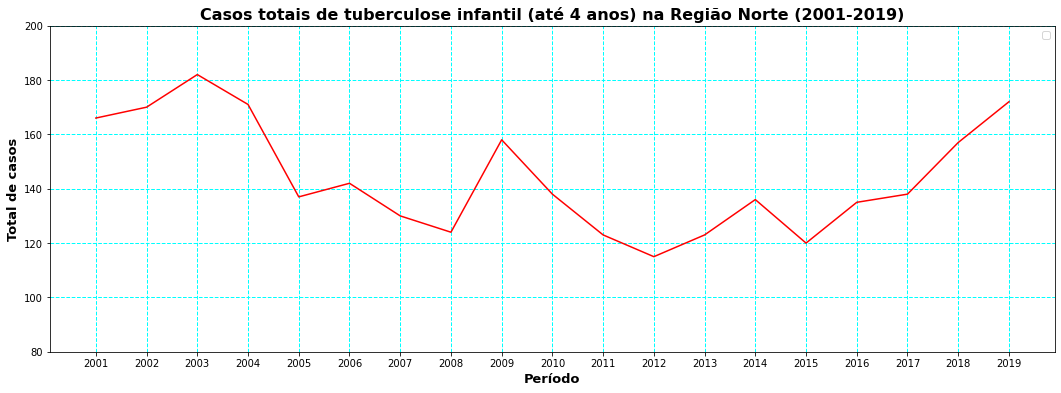

In [ ]:
ax = casos_tuber_infanto_por_regiao.iloc[2].plot(figsize = (18,6), color = 'r')
rotulos = dados_tuber[dados_tuber_infanto['Região'] == 'Norte'].drop(['Região'], axis = 1).columns
plt.xticks(ticks= np.arange(start = min(rotulos), stop = max(rotulos)+1), labels= rotulos)
plt.grid(linestyle = '--', linewidth = 1, color = 'cyan')
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
plt.ylabel('Total de casos', fontdict={'fontsize': 13, 'fontweight':'bold'})
plt.xlabel('Período', fontdict={'fontsize': 13, 'fontweight':'bold'})
plt.title('Casos totais de tuberculose infantil (até 4 anos) na Região Norte (2001-2019)', fontdict={'fontsize': 16, 'fontweight':'bold'})
plt.legend('')
plt.ylim(80,200)
plt.show()

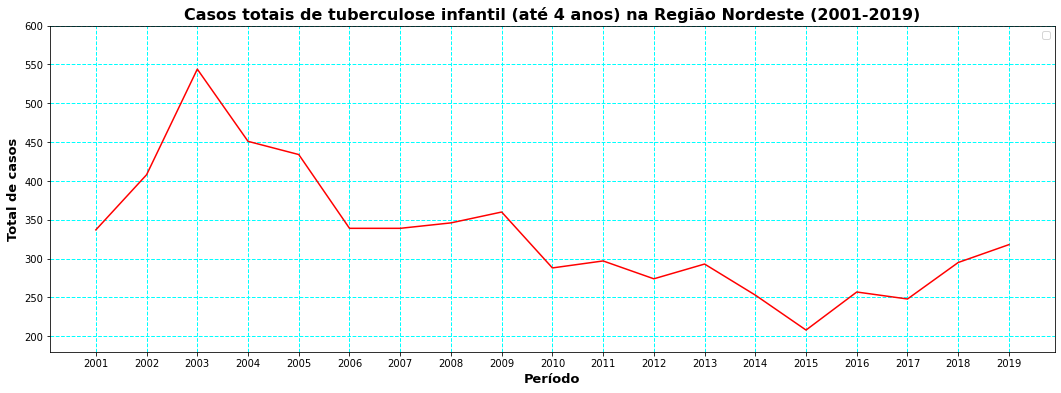

In [ ]:
ax = casos_tuber_infanto_por_regiao.iloc[1].plot(figsize = (18,6), color = 'r')
rotulos = dados_tuber[dados_tuber_infanto['Região'] == 'Nordeste'].drop(['Região'], axis = 1).columns
plt.xticks(ticks= np.arange(start = min(rotulos), stop = max(rotulos)+1), labels= rotulos)
plt.grid(linestyle = '--', linewidth = 1, color = 'cyan')
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
plt.ylabel('Total de casos', fontdict={'fontsize': 13, 'fontweight':'bold'})
plt.xlabel('Período', fontdict={'fontsize': 13, 'fontweight':'bold'})
plt.title('Casos totais de tuberculose infantil (até 4 anos) na Região Nordeste (2001-2019)', fontdict={'fontsize': 16, 'fontweight':'bold'})
plt.legend('')
plt.ylim(180,600)
plt.show()

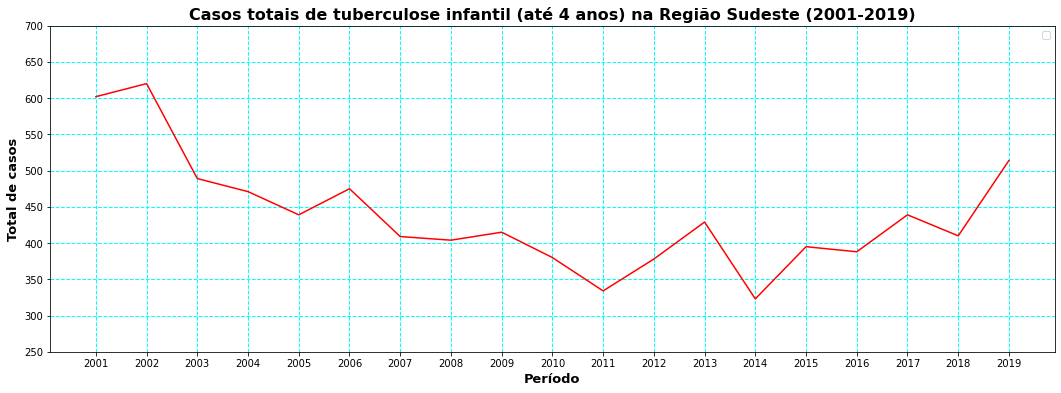

In [ ]:
ax = casos_tuber_infanto_por_regiao.iloc[3].plot(figsize = (18,6), color = 'r')
rotulos = dados_tuber[dados_tuber_infanto['Região'] == 'Sudeste'].drop(['Região'], axis = 1).columns
plt.xticks(ticks= np.arange(start = min(rotulos), stop = max(rotulos)+1), labels= rotulos)
plt.grid(linestyle = '--', linewidth = 1, color = 'cyan')
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
plt.ylabel('Total de casos', fontdict={'fontsize': 13, 'fontweight':'bold'})
plt.xlabel('Período', fontdict={'fontsize': 13, 'fontweight':'bold'})
plt.title('Casos totais de tuberculose infantil (até 4 anos) na Região Sudeste (2001-2019)', fontdict={'fontsize': 16, 'fontweight':'bold'})
plt.legend('')
plt.ylim(250,700)
plt.show()

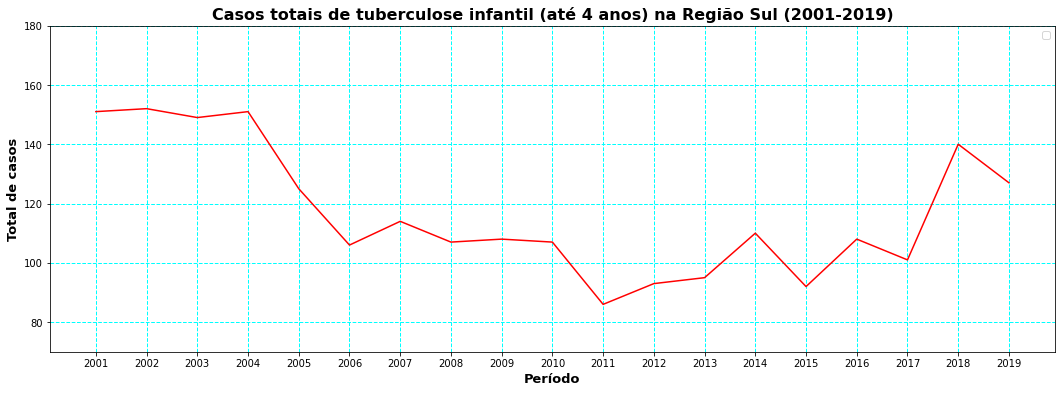

In [ ]:
ax = casos_tuber_infanto_por_regiao.iloc[4].plot(figsize = (18,6), color = 'r')
rotulos = dados_tuber[dados_tuber_infanto['Região'] == 'Sul'].drop(['Região'], axis = 1).columns
plt.xticks(ticks= np.arange(start = min(rotulos), stop = max(rotulos)+1), labels= rotulos)
plt.grid(linestyle = '--', linewidth = 1, color = 'cyan')
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
plt.ylabel('Total de casos', fontdict={'fontsize': 13, 'fontweight':'bold'})
plt.xlabel('Período', fontdict={'fontsize': 13, 'fontweight':'bold'})
plt.title('Casos totais de tuberculose infantil (até 4 anos) na Região Sul (2001-2019)', fontdict={'fontsize': 16, 'fontweight':'bold'})
plt.legend('')
plt.ylim(70,180)
plt.show()

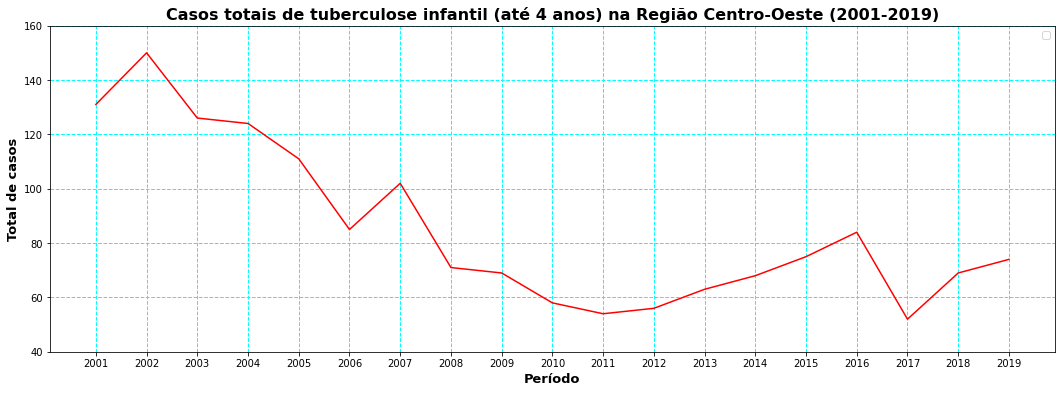

In [ ]:
ax = casos_tuber_infanto_por_regiao.iloc[0].plot(figsize = (18,6), color = 'r')
rotulos = dados_tuber[dados_tuber_infanto['Região'] == 'Centro-Oeste'].drop(['Região'], axis = 1).columns
plt.xticks(ticks= np.arange(start = min(rotulos), stop = max(rotulos)+1), labels= rotulos)
plt.grid(linestyle = '--', linewidth = 1, color = 'cyan')
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
plt.ylabel('Total de casos', fontdict={'fontsize': 13, 'fontweight':'bold'})
plt.xlabel('Período', fontdict={'fontsize': 13, 'fontweight':'bold'})
plt.title('Casos totais de tuberculose infantil (até 4 anos) na Região Centro-Oeste (2001-2019)', fontdict={'fontsize': 16, 'fontweight':'bold'})
plt.legend('')
plt.ylim(40,160)
plt.show()

Novamente, notamos, no geral, uma tentência de aumento a partir de 2015.

### Variação

Vamos estudar a variação do número de casos de tuberculose infantil:

In [ ]:
var_tuber_infanto = pd.DataFrame()
for ano in range(2002,2020):
  var_tuber_infanto[ano] = (casos_tuber_infanto_por_regiao[ano] / casos_tuber_infanto_por_regiao[ano -1] - 1)*100

In [ ]:
var_tuber_infanto

2002   2003   2004   2005   2006  ...   2015  2016   2017  2018  2019
Região                                          ...                                
Centro-Oeste 14.50 -16.00  -1.59 -10.48 -23.42  ...  10.29 12.00 -38.10 32.69  7.25
Nordeste     21.07  33.33 -17.10  -3.77 -21.89  ... -17.79 23.56  -3.50 18.95  7.80
Norte         2.41   7.06  -6.04 -19.88   3.65  ... -11.76 12.50   2.22 13.77  9.55
Sudeste       2.99 -21.13  -3.68  -6.79   8.20  ...  22.29 -1.77  13.14 -6.61 25.37
Sul           0.66  -1.97   1.34 -17.22 -15.20  ... -16.36 17.39  -6.48 38.61 -9.29

[5 rows x 18 columns]

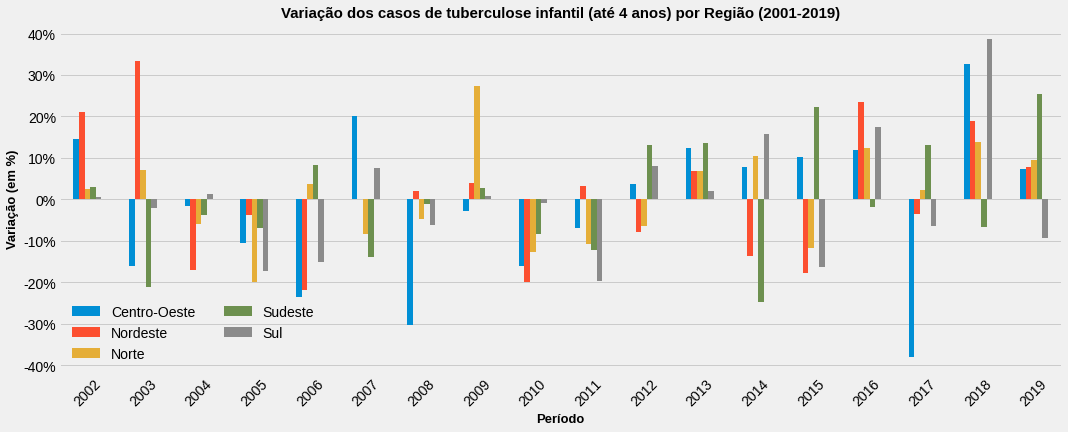

In [ ]:
ax = var_tuber_infanto.T.plot(kind = 'bar', figsize = (16,6))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%d%%'))
plt.title('Variação dos casos de tuberculose infantil (até 4 anos) por Região (2001-2019)', fontdict= {'fontsize':15, 'fontweight':'bold'})
plt.ylabel('Variação (em %)', fontdict= {'fontsize':13, 'fontweight':'bold'})
plt.xlabel('Período', fontdict= {'fontsize':13, 'fontweight':'bold'})
plt.xticks(rotation = 45)
plt.grid(axis = 'x')
plt.style.use('fivethirtyeight')
plt.legend(ncol = 2)
plt.show()

# Conclusão e estudos futuros

Por motivo de tempo, não foi possível fazer todas as análises que pretendia, ou mesmo detalhar mais as que fiz. Porém, a tese central está mais que provada:



***Na última década (2010-2019), houve uma queda expressiva das coberturas vacinais no Brasil. Tais quedas foram observadas em todas as regiões e em todos as unidades federativas e na maioria dos imunizantes.***

Em média, essa queda foi de -37.93%.

Rio de Janeiro teve a maior queda, de -61,68%.

Santa Catarina apresentou menor queda, de -18,32%.


Como já comentado, esses são dados alarmantes. Caso a tendência não seja revertida, não surtos de doenças graves, como tuberculose e poliomelite, podem começar a assolar o país nos próximos anos. 

É necessário realizar uma grande campanha de conscientização em toda a população, para enfatizar a importância e a segurança das vacinas. 

Vários questionamentos surgiram ao longo desse breve estudo introdutório, e que não foram devidamente respondidos ou explorados. Sumarizo aqui esses pontos, deixando-os como sugestões de trabalhos futuros:

- Houve supernotificação do número de doses de vacinas em 2014 e 2015, nos estados de Roraima, Rondônia, Ceará e Mato Grosso do Sul? Isso explicaria as coberturas vacinais muito acima de 100%? 
- Por que o Distrito Federal apresentou comportamento diferente das outras unidades federativas, sendo a única UF a apresentar aumento das coberturas vacinais em 2016? 
- Por que o Cerá apresentou uma diminuição da taxa de crescimento da população estimada, a partir de 2013?

Por fim, o grande questionamento que norteou a premissa inicial desse trabalho:

**A queda nas coberturas vacinais observada na última década (e mais acentuadamente nos últimos 5 anos) pode ser explicada pelo ganho de força do movimento antivacina?**

Nesse projeto não chegamos nem perto de responder essa pergunta. Não temos dados suficientes para isso. Seria preciso de alguma forma mensurar e quantificar esse aumento do movimento antivacina (se é que houve um aumento, pondo de forma mais cética), para só então comparar com a queda já observada das coberturas vacinais. Isso é um projeto que pretendo pôr em prática em um futuro próximo e colaboraçõe são bem vindas. 

O escopo básico desse projeto vindouro é:

- Coletar do Twitter, por meio de web scraping, dados de tweets relacionados ao tema antivacina.
- Tratar e limpar esses dados.
- Fazer uma análise estatística e temporal desses dados.
- Fazer uma análise de sentimentos desses dados.
- Confirmar ou não a correlação relação entre dados e os dados das coberturas vacinais.
